In [1]:
import pandas as pd
import numpy as np
from numpy import inf

# 查看westat版本号和安装路径
import westat as we

print('version:',we.version)
print('path:',we.__path__)
print('name:',we.__title__)
print('author:',we.__author__)
print('license:',we.__license__)
print('copyright:',we.__copyright__)

version: 0.2.5
path: ['C:\\Users\\about\\Desktop\\github\\westat\\westat']
name: westat
author: westat@foxmail.com
license: License :: OSI Approved :: GNU General Public License v3 (GPLv3)
copyright: Copyright (c) 2022-2023 westat team


## 一、数据准备

In [2]:
# westat 自带了 GiveMeSomeCredit 和 UCI_Credit_Card 两个数据集，可使用 GiveMeSomeCredit() 或 credit_card() 导入相关数据
# data=GiveMeSomeCredit()
# data_train = data.train
# data_test = data.test

# data=credit_card()


data=we.uci_credit_card()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# 将目标变量重命名为“y”
data.rename(columns={'target':'y'},inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 二、数据探索

In [4]:
# 查看数据
we.proc_means(data,['LIMIT_BAL','AGE'])

,Variable,N,Mean,Std Dev,Minimum,Maximum
0,LIMIT_BAL,30000,167484.32,129747.66,10000.0,1000000.0
1,AGE,30000,35.49,9.22,21.0,79.0


In [5]:
# 查看全部数据详情
we.data_desc(data)

,Name,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,int64,ID,30000,30000,100.00%,0,0.00%,30000,100.00%,450015000.00,1.00,15000.50,7500.75,15000.50,22500.25,30000.00,1.00,19997.00,20009.00
1,LIMIT_BAL,float64,feature,30000,30000,100.00%,0,0.00%,81,0.27%,5024529680.00,10000.00,167484.32,50000.00,140000.00,240000.00,1000000.00,50000.00,20000.00,30000.00
2,SEX,int64,feature,30000,30000,100.00%,0,0.00%,2,0.01%,48112.00,1.00,1.60,1.00,2.00,2.00,2.00,2.00,1.00,NaN
3,EDUCATION,int64,feature,30000,30000,100.00%,0,0.00%,7,0.02%,55594.00,0.00,1.85,1.00,2.00,2.00,6.00,2.00,1.00,3.00
4,MARRIAGE,int64,feature,30000,30000,100.00%,0,0.00%,4,0.01%,46556.00,0.00,1.55,1.00,2.00,2.00,3.00,2.00,1.00,3.00
5,AGE,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,1064565.00,21.00,35.49,28.00,34.00,41.00,79.00,29.00,27.00,28.00
6,PAY_0,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-501.00,-2.00,-0.02,-1.00,0.00,0.00,8.00,0.00,-1.00,1.00
7,PAY_2,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4013.00,-2.00,-0.13,-1.00,0.00,0.00,8.00,0.00,-1.00,2.00
8,PAY_3,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4986.00,-2.00,-0.17,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00
9,PAY_4,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-6620.00,-2.00,-0.22,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00


In [6]:
# 查看指定列的数据详情
we.data_desc(data[['AGE','PAY_0']])

,Name,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,AGE,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,1064565,21,35.49,28.00,34.00,41.00,79,29,27,28
1,PAY_0,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-501,-2,-0.02,-1.00,0.00,0.00,8,0,-1,1


In [7]:
# 查看指定的统计结果
we.data_desc(data,key=['#Mean'])

,Name,#Mean
0,ID,15000.50
1,LIMIT_BAL,167484.32
2,SEX,1.60
3,EDUCATION,1.85
4,MARRIAGE,1.55
5,AGE,35.49
6,PAY_0,-0.02
7,PAY_2,-0.13
8,PAY_3,-0.17
9,PAY_4,-0.22


In [8]:
# 查看数据详细信息，指定数据精度
we.data_desc(data,precision=4)

,Name,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,int64,ID,30000,30000,100.0000%,0,0.0000%,30000,100.0000%,450015000.0000,1.0000,15000.5000,7500.7500,15000.5000,22500.2500,30000.0000,1.0000,19997.0000,20009.0000
1,LIMIT_BAL,float64,feature,30000,30000,100.0000%,0,0.0000%,81,0.2700%,5024529680.0000,10000.0000,167484.3227,50000.0000,140000.0000,240000.0000,1000000.0000,50000.0000,20000.0000,30000.0000
2,SEX,int64,feature,30000,30000,100.0000%,0,0.0000%,2,0.0067%,48112.0000,1.0000,1.6037,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,NaN
3,EDUCATION,int64,feature,30000,30000,100.0000%,0,0.0000%,7,0.0233%,55594.0000,0.0000,1.8531,1.0000,2.0000,2.0000,6.0000,2.0000,1.0000,3.0000
4,MARRIAGE,int64,feature,30000,30000,100.0000%,0,0.0000%,4,0.0133%,46556.0000,0.0000,1.5519,1.0000,2.0000,2.0000,3.0000,2.0000,1.0000,3.0000
5,AGE,int64,feature,30000,30000,100.0000%,0,0.0000%,56,0.1867%,1064565.0000,21.0000,35.4855,28.0000,34.0000,41.0000,79.0000,29.0000,27.0000,28.0000
6,PAY_0,int64,feature,30000,30000,100.0000%,0,0.0000%,11,0.0367%,-501.0000,-2.0000,-0.0167,-1.0000,0.0000,0.0000,8.0000,0.0000,-1.0000,1.0000
7,PAY_2,int64,feature,30000,30000,100.0000%,0,0.0000%,11,0.0367%,-4013.0000,-2.0000,-0.1338,-1.0000,0.0000,0.0000,8.0000,0.0000,-1.0000,2.0000
8,PAY_3,int64,feature,30000,30000,100.0000%,0,0.0000%,11,0.0367%,-4986.0000,-2.0000,-0.1662,-1.0000,0.0000,0.0000,8.0000,0.0000,-1.0000,-2.0000
9,PAY_4,int64,feature,30000,30000,100.0000%,0,0.0000%,11,0.0367%,-6620.0000,-2.0000,-0.2207,-1.0000,0.0000,0.0000,8.0000,0.0000,-1.0000,-2.0000


In [9]:
# 查看数据详细信息，显示更多描述性统计信息，并以中文显示标题
we.data_desc(data,key=['Type','#Sum','#Min','#Q1','#Median','#Q3','#Max','#Mode','#Var','#Std','#Mean','#Kurt','#Skew','#StdMean','#Range','#Cv','#Sum_of_squares','Top1','Top2','Top3'],language='cn')

,名称,类型,#合计,#最小值,下四分位数,#中位数,上四分位数,#最大值,#众数,#方差,#标准差,#均值,#峰度,#偏度,#标准误差,#极差,#变异系数,#平方和,Top1,Top2,Top3
0,ID,int64,450015000.00,1.00,7500.75,15000.50,22500.25,30000.00,1.00,75002500.00,8660.40,15000.50,-1.20,0.00,50.00,29999.00,57.73%,9000450005000.00,1.00,19997.00,20009.00
1,LIMIT_BAL,float64,5024529680.00,10000.00,50000.00,140000.00,240000.00,1000000.00,50000.00,16834455682.16,129747.66,167484.32,0.54,0.99,749.10,990000.00,77.47%,1346546786182400.00,50000.00,20000.00,30000.00
2,SEX,int64,48112.00,1.00,1.00,2.00,2.00,2.00,2.00,0.24,0.49,1.60,-1.82,-0.42,0.00,1.00,30.50%,84336.00,2.00,1.00,NaN
3,EDUCATION,int64,55594.00,0.00,1.00,2.00,2.00,6.00,2.00,0.62,0.79,1.85,2.08,0.97,0.00,6.00,42.65%,121762.00,2.00,1.00,3.00
4,MARRIAGE,int64,46556.00,0.00,1.00,2.00,2.00,3.00,2.00,0.27,0.52,1.55,-1.36,-0.02,0.00,3.00,33.63%,80422.00,2.00,1.00,3.00
5,AGE,int64,1064565.00,21.00,28.00,34.00,41.00,79.00,29.00,84.97,9.22,35.49,0.04,0.73,0.05,58.00,25.98%,40325629.00,29.00,27.00,28.00
6,PAY_0,int64,-501.00,-2.00,-1.00,0.00,0.00,8.00,0.00,1.26,1.12,-0.02,2.72,0.73,0.01,10.00,-6729.35%,37895.00,0.00,-1.00,1.00
7,PAY_2,int64,-4013.00,-2.00,-1.00,0.00,0.00,8.00,0.00,1.43,1.20,-0.13,1.57,0.79,0.01,10.00,-894.98%,43533.00,0.00,-1.00,2.00
8,PAY_3,int64,-4986.00,-2.00,-1.00,0.00,0.00,8.00,0.00,1.43,1.20,-0.17,2.08,0.84,0.01,10.00,-720.14%,43802.00,0.00,-1.00,-2.00
9,PAY_4,int64,-6620.00,-2.00,-1.00,0.00,0.00,8.00,0.00,1.37,1.17,-0.22,3.50,1.00,0.01,10.00,-529.82%,42466.00,0.00,-1.00,-2.00


In [10]:
# 创建一个包含特征英文名 Name ，特征中文名 Label的 DataFrame
## 设置列的数据字典，包含Name 和Label 两列，用于保存特征英文名称，特征中文名称
data_dict = pd.DataFrame(data={'Name':['LIMIT_BAL','AGE','PAY_0'],'Label':['授信余额','年龄','支付金额']})
data_dict

,Name,Label
0,LIMIT_BAL,授信余额
1,AGE,年龄
2,PAY_0,支付金额


In [11]:
#使用数据字典，展示变量描述
we.get_data_describe(data,data_dict)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,,int64,ID,30000,30000,100.00%,0,0.00%,30000,100.00%,450015000.00,1.00,15000.50,7500.75,15000.50,22500.25,30000.00,1.00,19997.00,20009.00
1,LIMIT_BAL,授信余额,float64,feature,30000,30000,100.00%,0,0.00%,81,0.27%,5024529680.00,10000.00,167484.32,50000.00,140000.00,240000.00,1000000.00,50000.00,20000.00,30000.00
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,0.01%,48112.00,1.00,1.60,1.00,2.00,2.00,2.00,2.00,1.00,
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,0.02%,55594.00,0.00,1.85,1.00,2.00,2.00,6.00,2.00,1.00,3.00
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,0.01%,46556.00,0.00,1.55,1.00,2.00,2.00,3.00,2.00,1.00,3.00
5,AGE,年龄,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,1064565.00,21.00,35.49,28.00,34.00,41.00,79.00,29.00,27.00,28.00
6,PAY_0,支付金额,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-501.00,-2.00,-0.02,-1.00,0.00,0.00,8.00,0.00,-1.00,1.00
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4013.00,-2.00,-0.13,-1.00,0.00,0.00,8.00,0.00,-1.00,2.00
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-4986.00,-2.00,-0.17,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-6620.00,-2.00,-0.22,-1.00,0.00,0.00,8.00,0.00,-1.00,-2.00


## 查看数据分布

In [12]:
# 查看目标变量的数据分布
we.value_counts(data)

,No.,Name,Value,#Count,%Ratio
0,1,y,0,23364.00,77.88%
1,2,y,1,6636.00,22.12%
2,Total,,,30000.00,100.00%


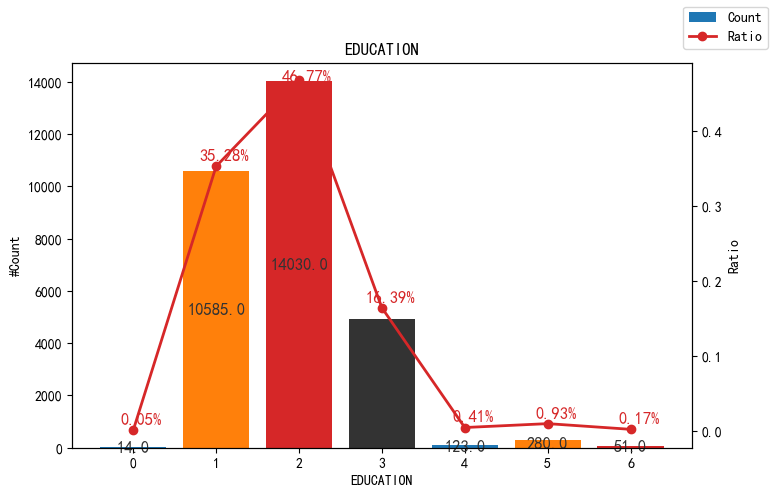

,No.,Name,Value,#Count,%Ratio
0,1,EDUCATION,2,14030.00,46.77%
1,2,EDUCATION,1,10585.00,35.28%
2,3,EDUCATION,3,4917.00,16.39%
3,4,EDUCATION,5,280.00,0.93%
4,5,EDUCATION,4,123.00,0.41%
5,6,EDUCATION,6,51.00,0.17%
6,7,EDUCATION,0,14.00,0.05%
7,Total,,,30000.00,100.00%


In [13]:
# 通过绘图查看指定变量的取值分布
we.plot_counts(data,'EDUCATION',return_data=True)

## 数据分区

In [14]:
# 使用 data_split 函数，按随机测试集25%进行数据分区
data_train,data_test = we.data_split(data,0.25)

In [15]:
# 查看数据分区后的训练集数据分布
we.value_counts(data_train)

,No.,Name,Value,#Count,%Ratio
0,1,y,0,17564.00,78.06%
1,2,y,1,4936.00,21.94%
2,Total,,,22500.00,100.00%


In [16]:
# 查看数据分区后的测试集数据分布
we.value_counts(data_test)

,No.,Name,Value,#Count,%Ratio
0,1,y,0,5800.00,77.33%
1,2,y,1,1700.00,22.67%
2,Total,,,7500.00,100.00%


## 特征分箱

### 最优分箱

In [17]:
# 使用默认的分箱方法分箱
we.woe_iv(data,col='AGE')

(CVXPY) Jul 10 10:32:32 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jul 10 10:32:32 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,AGE,1,"(-inf, 25.5]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.3910
1,AGE,2,"(25.5, 28.5]",4142,852,3290,13.8067%,12.8391%,14.0815%,20.5698%,-0.0924,0.0011,0.3268
2,AGE,3,"(28.5, 35.5]",8796,1713,7083,29.3200%,25.8137%,30.3159%,19.4748%,-0.1608,0.0072,0.3136
3,AGE,4,"(35.5, 45.5]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.3414
4,AGE,5,"(45.5, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.3773
5,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,0.1494,0.0217,1.7501


### 等频分箱

In [18]:
# 通过qcut参数设置等频分箱，计算 WoE和IV
we.woe_iv(data,col='AGE',qcut=5)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.0133%,24.0808%,21.4261%,24.1975%,0.1168,0.0031,0.3668
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.7533%,16.6064%,19.3631%,19.5876%,-0.1536,0.0042,0.3150
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.4267%,20.7957%,22.8899%,20.5113%,-0.0960,0.0020,0.3261
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.8533%,16.5763%,16.9320%,21.7563%,-0.0212,0.0001,0.3405
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.9533%,21.9409%,19.3888%,24.3234%,0.1237,0.0032,0.3681
5,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,-0.0303,0.0126,1.7165


### 指定切分点分箱

In [19]:
# 通过bins参数设置指定的切分点进行分箱，计算 WoE和IV
we.woe_iv(data,'AGE',bins=[-inf,20,30,40,50,inf])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,AGE,1,"(-inf, 20.0]",0,0,0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000,0.0000,0.0000
1,AGE,2,"(20.0, 30.0]",11013,2471,8542,36.7100%,37.2363%,36.5605%,22.4371%,0.0183,0.0001,0.3481
2,AGE,3,"(30.0, 40.0]",10713,2189,8524,35.7100%,32.9867%,36.4835%,20.4331%,-0.1008,0.0035,0.3252
3,AGE,4,"(40.0, 50.0]",6005,1399,4606,20.0167%,21.0820%,19.7141%,23.2973%,0.0671,0.0009,0.3574
4,AGE,5,"(50.0, inf]",2269,577,1692,7.5633%,8.6950%,7.2419%,25.4297%,0.1829,0.0027,0.3793
5,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,0.1675,0.0072,1.4100


### 决策树分箱

In [20]:
# 通过method参数指定tree, 使用决策树方法进行分箱
we.woe_iv(data,col='AGE',method ='tree',max_bins=5)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.3910
1,AGE,2,"(25.0, 28.0]",4142,852,3290,13.8067%,12.8391%,14.0815%,20.5698%,-0.0924,0.0011,0.3268
2,AGE,3,"(28.0, 35.0]",8796,1713,7083,29.3200%,25.8137%,30.3159%,19.4748%,-0.1608,0.0072,0.3136
3,AGE,4,"(35.0, 45.0]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.3414
4,AGE,5,"(45.0, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.3773
5,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,0.1494,0.0217,1.7501


### 根据离散化数据分箱

In [21]:
# 通过method参数指定discrete，使用已经分箱后的数据计算woe和iv
age_bins = [-inf, 25, 40, 50, 60, 70, inf]
data['bin_age'] = pd.cut(data['AGE'],bins=age_bins).astype(str)

we.woe_iv(data,'bin_age',method='discrete')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,bin_age,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.3910
1,bin_age,2,"(25.0, 40.0]",17855,3628,14227,59.5167%,54.6715%,60.8928%,20.3192%,-0.1078,0.0067,0.3238
2,bin_age,3,"(40.0, 50.0]",6005,1399,4606,20.0167%,21.0820%,19.7141%,23.2973%,0.0671,0.0009,0.3574
3,bin_age,4,"(50.0, 60.0]",1997,504,1493,6.6567%,7.5949%,6.3902%,25.2379%,0.1727,0.0021,0.3774
4,bin_age,5,"(60.0, 70.0]",257,68,189,0.8567%,1.0247%,0.8089%,26.4591%,0.2364,0.0005,0.3892
5,bin_age,6,"(70.0, inf]",15,5,10,0.0500%,0.0753%,0.0428%,33.3333%,0.5655,0.0002,0.4444
6,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,1.1808,0.0188,2.2832


In [22]:
# 删除测试数据
data.drop(columns=['bin_age'],inplace=True)

### 分箱时指定特殊值为缺失值

In [23]:
# 指定缺失值类型，并使用最优分箱，计算WoE和IV, 
we.woe_iv(data,col='PAY_0',method='optb',missing = [-99999,99999999])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,PAY_0,1,"(-inf, -0.5]",8445,1319,7126,28.1500%,19.8764%,30.4999%,15.6187%,-0.4282,0.0455,0.2636
1,PAY_0,2,"(-0.5, 0.5]",14737,1888,12849,49.1233%,28.4509%,54.9949%,12.8113%,-0.6591,0.1749,0.2234
2,PAY_0,3,"(0.5, 1.5]",3688,1252,2436,12.2933%,18.8668%,10.4263%,33.9479%,0.5931,0.0501,0.4485
3,PAY_0,4,"(1.5, inf]",3130,2177,953,10.4333%,32.8059%,4.0789%,69.5527%,2.0848,0.5989,0.4235
4,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,1.5906,0.8694,1.3590


In [24]:
# 指定缺失值类型，并使用决策树进行分箱，计算WoE和IV, 
data.loc[0,'PAY_0']= np.nan
data.loc[1,'PAY_0'] = -99999
data.loc[2,'PAY_0'] = 99999999

we.woe_iv(data,col='PAY_0',method='tree',missing = [-99999,99999999])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,PAY_0,1,missing,3,2,1,0.0100%,0.0301%,0.0043%,66.6667%,1.9518,0.0005,0.4444
1,PAY_0,2,"(-inf, -2.0]",2759,365,2394,9.1967%,5.5003%,10.2465%,13.2294%,-0.6221,0.0295,0.2296
2,PAY_0,3,"(-2.0, -1.0]",5685,953,4732,18.9500%,14.3611%,20.2534%,16.7634%,-0.3438,0.0203,0.2791
3,PAY_0,4,"(-1.0, 0.0]",14736,1888,12848,49.1200%,28.4509%,54.9906%,12.8122%,-0.6590,0.1749,0.2234
4,PAY_0,5,"(0.0, 1.0]",3688,1252,2436,12.2933%,18.8668%,10.4263%,33.9479%,0.5931,0.0501,0.4485
5,PAY_0,6,"(1.0, inf]",3129,2176,953,10.4300%,32.7908%,4.0789%,69.5430%,2.0843,0.5984,0.4236
6,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,3.0043,0.8737,2.0486


## 查看WoE 和 IV

In [25]:
# 按照默认分箱，将特征最大分为5箱，并要求分箱保持单调性，计算WoE 和 IV，并查看WoE的分布
we.view_woe_iv(data,'AGE',max_bins=5,trend='asc')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini,WoE.
0,AGE,1,"(-inf, 35.5]",16809,3597,13212,56.0300%,54.2043%,56.5485%,21.3993%,-0.0423,0.0010,0.336400,-0.042300
1,AGE,2,"(35.5, 39.5]",4047,876,3171,13.4900%,13.2007%,13.5722%,21.6457%,-0.0277,0.0001,0.339200,-0.027700
2,AGE,3,"(39.5, 45.5]",4475,985,3490,14.9167%,14.8433%,14.9375%,22.0112%,-0.0063,0.0000,0.343300,-0.006300
3,AGE,4,"(45.5, 48.5]",1537,381,1156,5.1233%,5.7414%,4.9478%,24.7885%,0.1488,0.0012,0.372900,0.148800
4,AGE,5,"(48.5, inf]",3132,797,2335,10.4400%,12.0102%,9.9940%,25.4470%,0.1838,0.0037,0.379400,0.183800
5,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,0.2561,0.0060,1.771200,0.256100


In [26]:
# 按照默认分箱方法，计算WoE 和 IV，并查看WoE的分布
we.view_woe_iv(data,'AGE')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini,WoE.
0,AGE,1,"(-inf, 25.5]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.391000,0.246700
1,AGE,2,"(25.5, 28.5]",4142,852,3290,13.8067%,12.8391%,14.0815%,20.5698%,-0.0924,0.0011,0.326800,-0.092400
2,AGE,3,"(28.5, 35.5]",8796,1713,7083,29.3200%,25.8137%,30.3159%,19.4748%,-0.1608,0.0072,0.313600,-0.160800
3,AGE,4,"(35.5, 45.5]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.341400,-0.016500
4,AGE,5,"(45.5, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.377300,0.172300
5,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,0.1494,0.0217,1.750100,0.149400


In [27]:
# 按照默认的分箱方法，计算WoE 和 IV，并查看WoE的分布 , 设置显示的颜色为绿色
we.view_woe_iv(data,'AGE',color='green')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini,WoE.
0,AGE,1,"(-inf, 25.5]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.391000,0.246700
1,AGE,2,"(25.5, 28.5]",4142,852,3290,13.8067%,12.8391%,14.0815%,20.5698%,-0.0924,0.0011,0.326800,-0.092400
2,AGE,3,"(28.5, 35.5]",8796,1713,7083,29.3200%,25.8137%,30.3159%,19.4748%,-0.1608,0.0072,0.313600,-0.160800
3,AGE,4,"(35.5, 45.5]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.341400,-0.016500
4,AGE,5,"(45.5, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.377300,0.172300
5,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,0.1494,0.0217,1.750100,0.149400


In [28]:
# 按照默认的分箱方法，计算WoE 和 IV，并查看WoE的分布，设置显示的颜色
we.view_woe_iv(data,'AGE',color='#02B057')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini,WoE.
0,AGE,1,"(-inf, 25.5]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.391000,0.246700
1,AGE,2,"(25.5, 28.5]",4142,852,3290,13.8067%,12.8391%,14.0815%,20.5698%,-0.0924,0.0011,0.326800,-0.092400
2,AGE,3,"(28.5, 35.5]",8796,1713,7083,29.3200%,25.8137%,30.3159%,19.4748%,-0.1608,0.0072,0.313600,-0.160800
3,AGE,4,"(35.5, 45.5]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.341400,-0.016500
4,AGE,5,"(45.5, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.377300,0.172300
5,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,0.1494,0.0217,1.750100,0.149400


In [29]:
# 按照等频分箱，将特征分为5箱，计算WoE 和 IV，并查看WoE的分布
we.view_woe_iv(data,'AGE',qcut=5,precision=2)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini,WoE.
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.12,0.00,0.366800,0.120000
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.15,0.00,0.315000,-0.150000
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.10,0.00,0.326100,-0.100000
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.02,0.00,0.340500,-0.020000
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.12,0.00,0.368100,0.120000
5,Total,,,30000,6636,23364,100.00%,100.00%,100.00%,22.12%,-0.03,0.01,1.716500,-0.030000


In [30]:
# 按照决策树分箱，将特征最大分为4箱，计算WoE 和 IV，并查看WoE的分布
we.view_woe_iv(data,'AGE',method='tree',max_bins=4)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.391000,0.246700
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.1267%,38.6528%,44.3974%,19.8253%,-0.1386,0.0080,0.317900,-0.138600
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.341400,-0.016500
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.377300,0.172300
4,Total,,,30000,6636,23364,100.0000%,100.0000%,100.0000%,22.1200%,0.2640,0.0213,1.427600,0.264000


## 计算WOE 并绘图

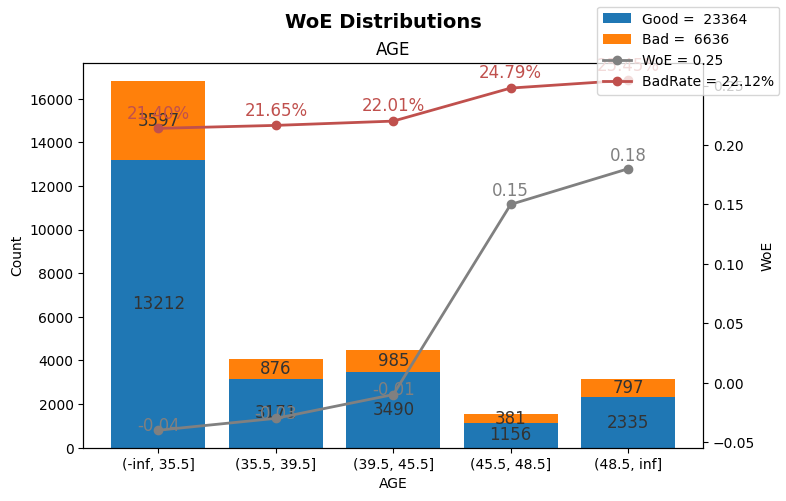

In [31]:
# 根据默认参数，将特征分箱，计算WoE,并展示图形
we.plot_woe(data,'AGE',max_bins=5,trend='asc')

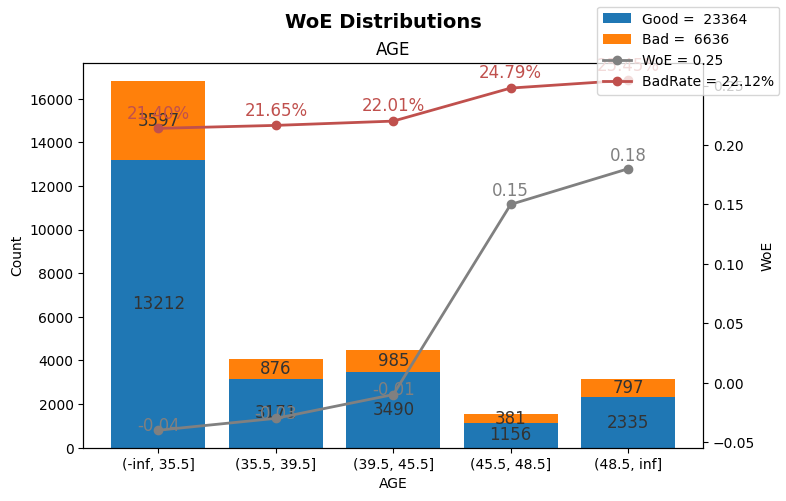

In [32]:
# 根据默认参数，将特征分箱，设置分箱单调递增，计算WoE,并展示图形
we.plot_woe(data,'AGE',max_bins=5,trend='ascending',precision=2)

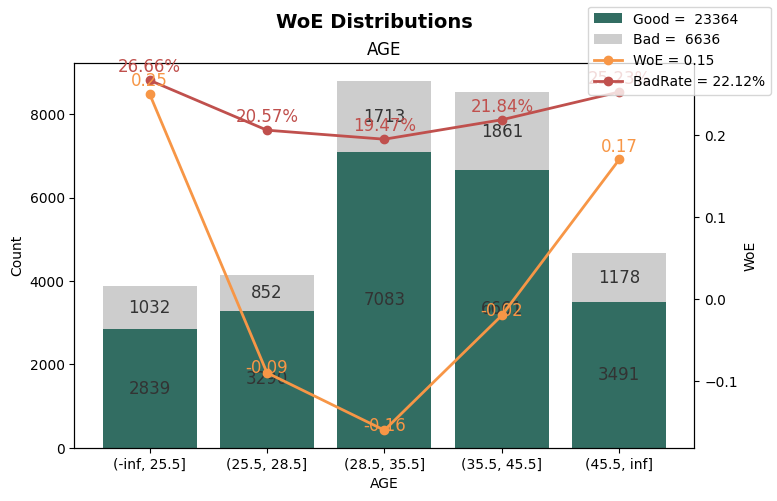

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,AGE,1,"(-inf, 25.5]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.39
1,AGE,2,"(25.5, 28.5]",4142,852,3290,13.81%,12.84%,14.08%,20.57%,-0.09,0.00,0.33
2,AGE,3,"(28.5, 35.5]",8796,1713,7083,29.32%,25.81%,30.32%,19.47%,-0.16,0.01,0.31
3,AGE,4,"(35.5, 45.5]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.34
4,AGE,5,"(45.5, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.38
5,Total,,,30000,6636,23364,100.00%,100.00%,100.00%,22.12%,0.15,0.02,1.75


In [33]:
# 根据默认参数，将特征分箱，并计算WoE,并展示图形 和 数据
we.plot_woe(data,'AGE',max_bins=5,return_data =True,theme=1)

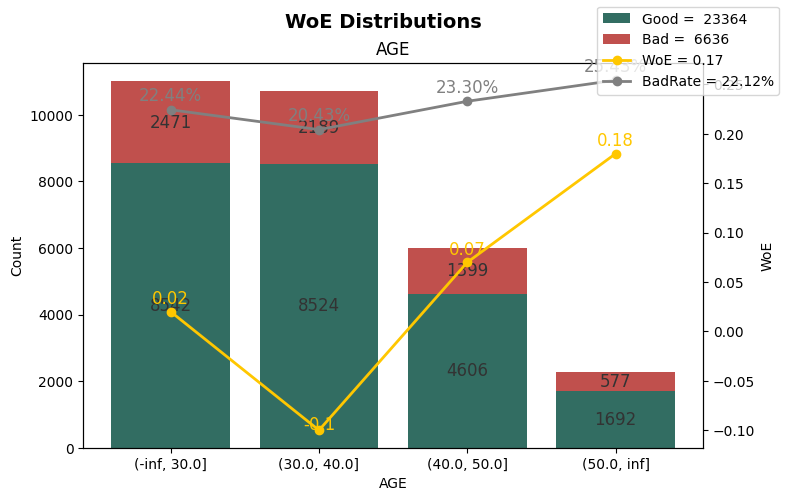

In [34]:
# 根据指定切分点计算WoE,并展示图形
we.plot_woe(data,'AGE',bins=[-inf,30,40,50,inf],theme=2)

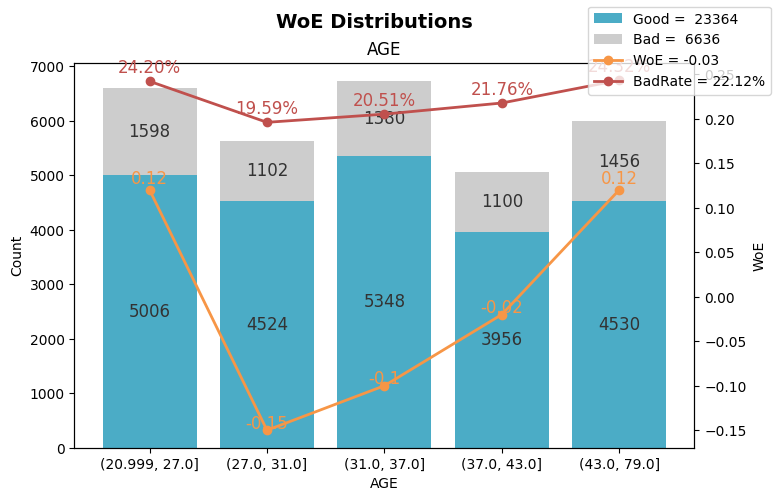

In [35]:
# 根据等频分箱，将特征分为5箱，并计算WoE,并展示图形
we.plot_woe(data,'AGE',qcut=5,theme=3)

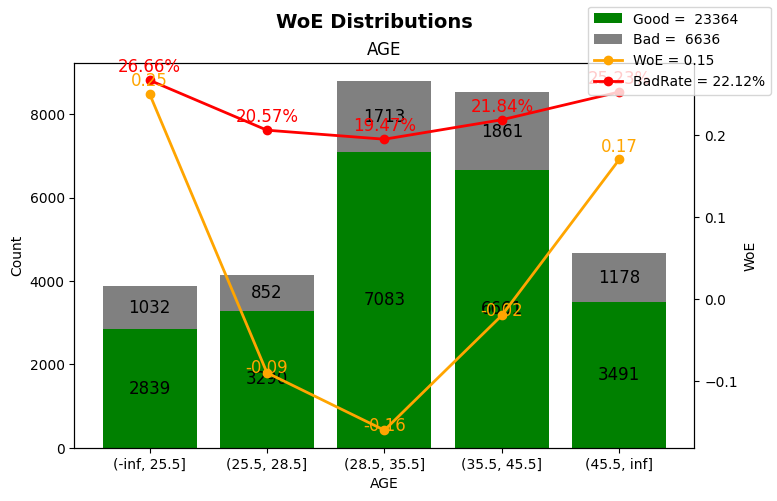

In [36]:
# 根据默认的分箱方法分箱，并计算WoE,设置图形的颜色和样式，并展示图形
we.plot_woe(data,'AGE',color=['green','gray','orange','red','black'],linewidth=2,linestyle='-')

## 计算 IV 并绘图

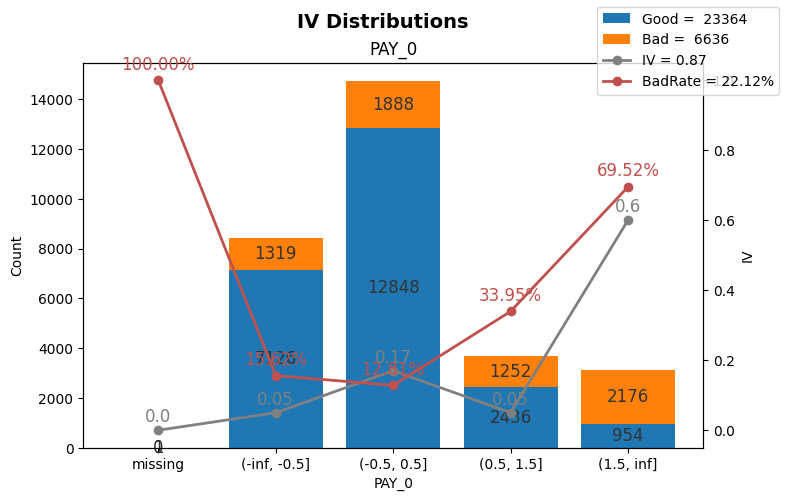

In [37]:
# 根据默认的分箱方法分箱，并计算IV，展示图形
we.plot_iv(data,'PAY_0')

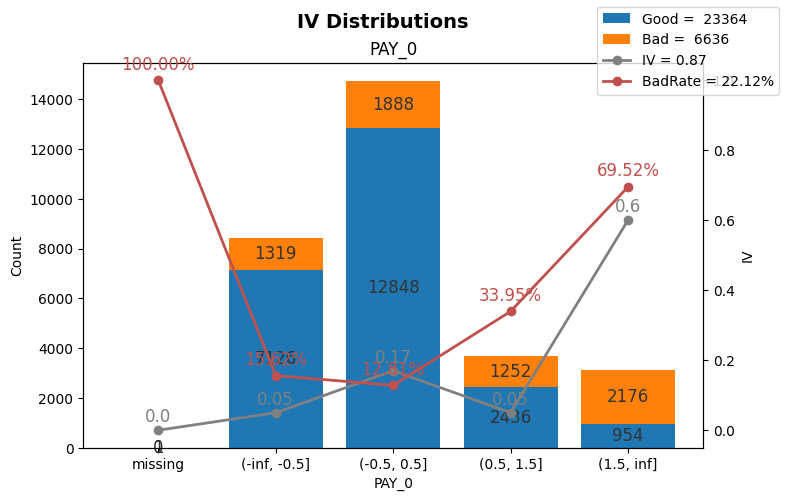

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,PAY_0,1,missing,1,1,0,0.00%,0.02%,0.00%,100.00%,0.00,0.00,0.00
1,PAY_0,2,"(-inf, -0.5]",8445,1319,7126,28.15%,19.88%,30.50%,15.62%,-0.43,0.05,0.26
2,PAY_0,3,"(-0.5, 0.5]",14736,1888,12848,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.22
3,PAY_0,4,"(0.5, 1.5]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.45
4,PAY_0,5,"(1.5, inf]",3130,2176,954,10.43%,32.79%,4.08%,69.52%,2.08,0.60,0.42
5,Total,,,30000,6636,23364,100.00%,100.00%,100.00%,22.12%,1.59,0.87,1.36


In [38]:
# 根据默认的分箱方法，并计算IV，展示图形 和 数据
we.plot_iv(data,'PAY_0',return_data=True)

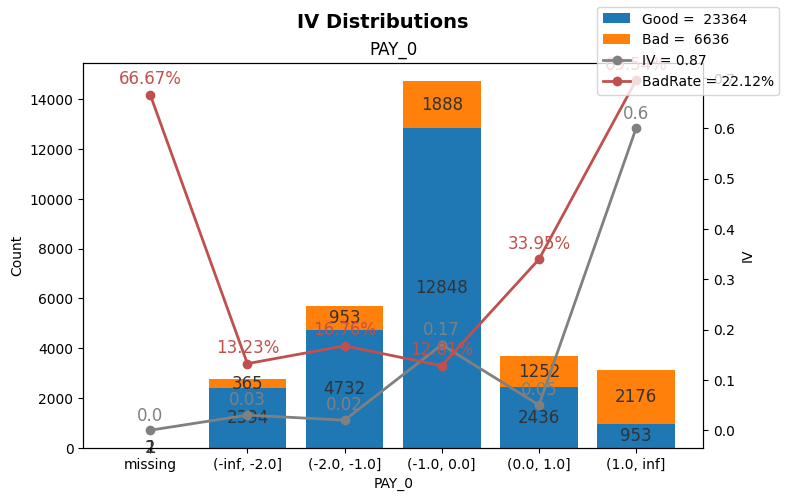

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,PAY_0,1,missing,3,2,1,0.01%,0.03%,0.00%,66.67%,1.95,0.00,0.44
1,PAY_0,2,"(-inf, -2.0]",2759,365,2394,9.20%,5.50%,10.25%,13.23%,-0.62,0.03,0.23
2,PAY_0,3,"(-2.0, -1.0]",5685,953,4732,18.95%,14.36%,20.25%,16.76%,-0.34,0.02,0.28
3,PAY_0,4,"(-1.0, 0.0]",14736,1888,12848,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.22
4,PAY_0,5,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.45
5,PAY_0,6,"(1.0, inf]",3129,2176,953,10.43%,32.79%,4.08%,69.54%,2.08,0.60,0.42
6,Total,,,30000,6636,23364,100.00%,100.00%,100.00%,22.12%,3.00,0.87,2.05


In [39]:
# 根据决策树分箱方法，并计算IV，展示图形
we.plot_iv(data,'PAY_0',method='tree',return_data=True,precision=2,missing=[-99999,99999999])

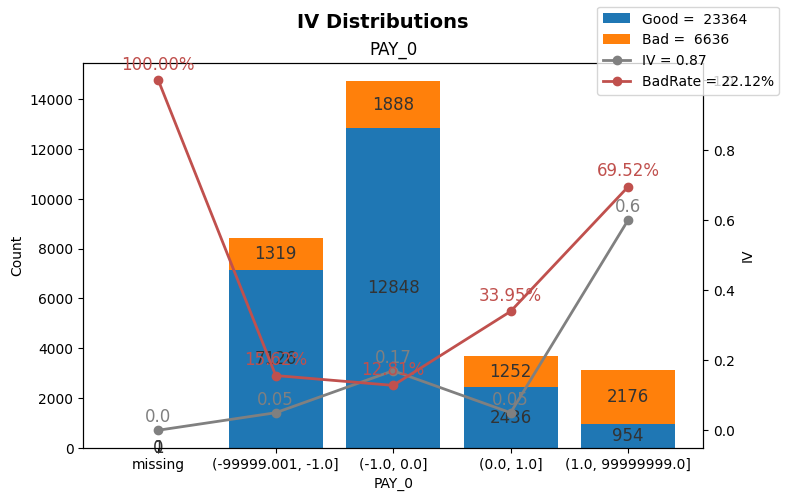

In [40]:
# 根据等频分箱，将特征分为5箱，并计算IV,展示图形
we.plot_iv(data,'PAY_0',qcut=5)

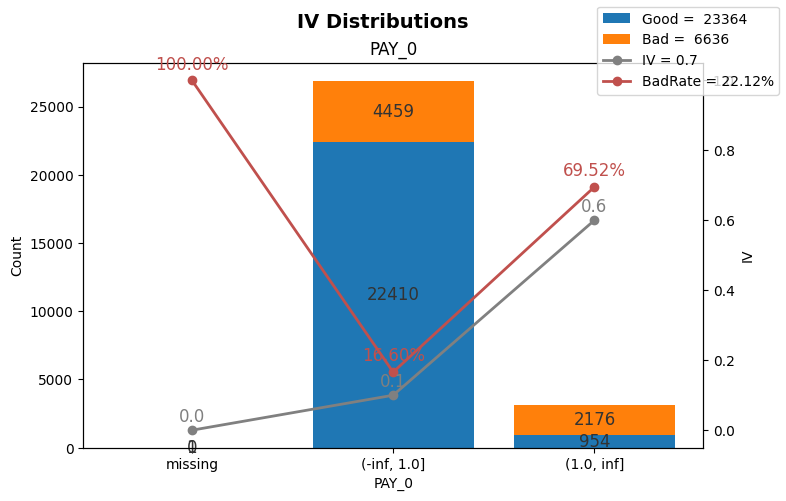

In [41]:
# 根据指定的切分点，将特征分箱，并计算IV,展示图形
we.plot_iv(data,'PAY_0',bins=[-inf,1,inf])

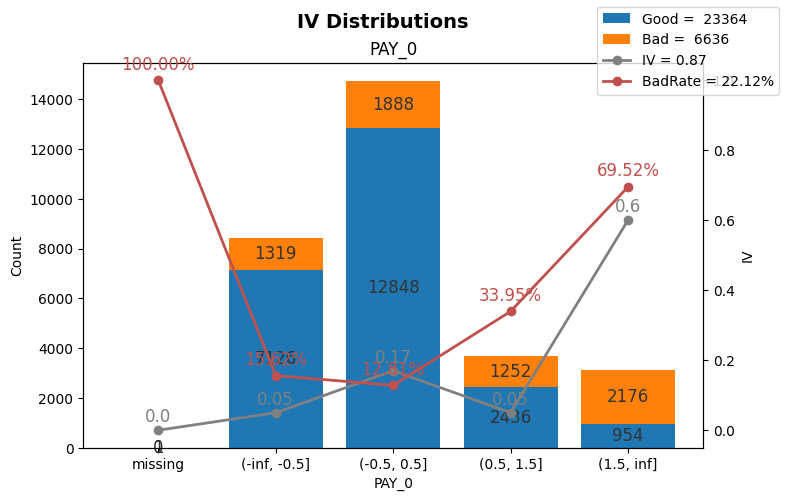

In [42]:
# 根据默认分箱方法，将特征分箱，并计算IV,展示图形
we.plot_iv(data,'PAY_0',method='optb',max_bins=4)

### 获取列的数据类型，离散型、连续型

In [43]:
data_types = we.get_data_type(data)
data_types

,Name,Type
0,ID,continuous
1,LIMIT_BAL,continuous
2,SEX,continuous
3,EDUCATION,continuous
4,MARRIAGE,continuous
5,AGE,continuous
6,PAY_0,continuous
7,PAY_2,continuous
8,PAY_3,continuous
9,PAY_4,continuous


## 决策树分箱

In [44]:
# 根据决策树方法，获取特征的分箱切分点结果
we.tree_bins(data, 'AGE', max_leaf_nodes=4,min_samples_leaf=0.05)

[-inf, 25.0, 35.0, 45.0, inf]

## 最优分箱

In [45]:
we.get_bins(data,'AGE',method='optb',max_bins=5)

[-inf, 25.5, 28.5, 35.5, 45.5, inf]

In [46]:
# 分箱并要求单调递增
we.get_bins(data,'AGE',method='optb',max_bins=5,trend='asc')

[-inf, 35.5, 39.5, 45.5, 48.5, inf]

In [47]:
# 分箱并要求单调递减
we.get_bins(data,'AGE',method='optb',max_bins=5,trend='desc')

[-inf, 23.5, 25.5, inf]

## 批量分箱

In [48]:
# 根据默认分箱方法，进行批量分箱
we.get_data_bins(data)

,Name,Bins
0,ID,"[-inf, 18455.5, 21540.5, 23049.5, 26441.5, inf]"
1,LIMIT_BAL,"[-inf, 45000.0, 125000.0, 165000.0, 365000.0, inf]"
2,SEX,"[-inf, 1.5, inf]"
3,EDUCATION,"[-inf, 1.5, 2.5, inf]"
4,MARRIAGE,"[-inf, 1.5, inf]"
5,AGE,"[-inf, 25.5, 28.5, 35.5, 45.5, inf]"
6,PAY_0,"[-inf, -0.5, 0.5, 1.5, inf]"
7,PAY_2,"[-inf, -1.5, -0.5, 1.5, inf]"
8,PAY_3,"[-inf, -1.5, -0.5, 1.5, inf]"
9,PAY_4,"[-inf, -1.5, -0.5, 0.5, inf]"


In [49]:
# 根据默认分箱方法，最大分为5箱，批量分箱
data_bins = we.get_data_bins(data,max_bins=5,trend='asc')
data_bins

,Name,Bins
0,ID,"[-inf, 18455.5, 21540.5, 23049.5, 26441.5, inf]"
1,LIMIT_BAL,"[-inf, 45000.0, 125000.0, 165000.0, 365000.0, inf]"
2,SEX,"[-inf, 1.5, inf]"
3,EDUCATION,"[-inf, 1.5, 2.5, inf]"
4,MARRIAGE,"[-inf, 1.5, inf]"
5,AGE,"[-inf, 25.5, 28.5, 35.5, 45.5, inf]"
6,PAY_0,"[-inf, -0.5, 0.5, 1.5, inf]"
7,PAY_2,"[-inf, -1.5, -0.5, 1.5, inf]"
8,PAY_3,"[-inf, -1.5, -0.5, 1.5, inf]"
9,PAY_4,"[-inf, -1.5, -0.5, 0.5, inf]"


## 手动调整分箱

In [50]:
data_bins_adjust = we.update_bins(data_bins,
[
['AGE',[-inf,20,30,40,50,inf]],
['BILL_AMT1',[-inf,1000,8000,50000,inf]],
])
data_bins_adjust

,Name,Bins
0,ID,"[-inf, 18455.5, 21540.5, 23049.5, 26441.5, inf]"
1,LIMIT_BAL,"[-inf, 45000.0, 125000.0, 165000.0, 365000.0, inf]"
2,SEX,"[-inf, 1.5, inf]"
3,EDUCATION,"[-inf, 1.5, 2.5, inf]"
4,MARRIAGE,"[-inf, 1.5, inf]"
5,AGE,"[-inf, 20, 30, 40, 50, inf]"
6,PAY_0,"[-inf, -0.5, 0.5, 1.5, inf]"
7,PAY_2,"[-inf, -1.5, -0.5, 1.5, inf]"
8,PAY_3,"[-inf, -1.5, -0.5, 1.5, inf]"
9,PAY_4,"[-inf, -1.5, -0.5, 0.5, inf]"


## 数据离散化

In [51]:
# 根据默认分箱方法，并将数据离散化
we.data_discrete(data)

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(-inf, 18455.5]","(-inf, 45000.0]","(1.5, inf]","(1.5, 2.5]","(-inf, 1.5]","(-inf, 25.5]",missing,"(1.5, inf]","(-1.5, -0.5]","(-1.5, -0.5]","(-inf, -1.5]","(-inf, -1.5]","(782.5, 34525.0]","(1050.5, 35018.5]","(464.5, 3114.5]","(-inf, 787.5]","(-inf, 390.5]","(-inf, 420.5]","(-inf, 21.5]","(91.0, 1602.5]","(-inf, 1.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 1.5]",1
1,"(-inf, 18455.5]","(45000.0, 125000.0]","(1.5, inf]","(1.5, 2.5]","(1.5, inf]","(25.5, 28.5]","(-inf, -0.5]","(1.5, inf]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(1.0, inf]","(782.5, 34525.0]","(1050.5, 35018.5]","(464.5, 3114.5]","(2512.5, 7796.5]","(2501.5, 8499.5]","(2658.0, 5415.5]","(-inf, 21.5]","(91.0, 1602.5]","(1.5, 2928.5]","(0.5, 1900.5]","(-inf, 0.5]","(1.5, 2000.5]",1
2,"(-inf, 18455.5]","(45000.0, 125000.0]","(1.5, inf]","(1.5, 2.5]","(1.5, inf]","(28.5, 35.5]","(1.5, inf]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(782.5, 34525.0]","(1050.5, 35018.5]","(7721.0, inf]","(7796.5, 16645.0]","(12542.5, inf]","(8814.0, inf]","(21.5, 2000.5]","(91.0, 1602.5]","(1.5, 2928.5]","(0.5, 1900.5]","(0.5, 1935.5]","(4058.0, 9849.5]",0
3,"(-inf, 18455.5]","(45000.0, 125000.0]","(1.5, inf]","(1.5, 2.5]","(-inf, 1.5]","(35.5, 45.5]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(34525.0, 90643.0]","(35018.5, 92368.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(21.5, 2000.5]","(1602.5, 4980.5]","(1.5, 2928.5]","(0.5, 1900.5]","(0.5, 1935.5]","(1.5, 2000.5]",0
4,"(-inf, 18455.5]","(45000.0, 125000.0]","(-inf, 1.5]","(1.5, 2.5]","(-inf, 1.5]","(45.5, inf]","(-inf, -0.5]","(-0.5, 1.5]","(-1.5, -0.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(782.5, 34525.0]","(1050.5, 35018.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(21.5, 2000.5]","(15001.0, inf]","(4641.5, 16884.0]","(4327.5, 15090.0]","(0.5, 1935.5]","(1.5, 2000.5]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"(26441.5, inf]","(165000.0, 365000.0]","(-inf, 1.5]","(2.5, inf]","(-inf, 1.5]","(35.5, 45.5]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(152362.0, inf]","(156337.0, inf]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(4552.5, 17588.0]","(15001.0, inf]","(4641.5, 16884.0]","(1900.5, 4327.5]","(3997.5, 9986.5]","(1.5, 2000.5]",0
29996,"(26441.5, inf]","(125000.0, 165000.0]","(-inf, 1.5]","(2.5, inf]","(1.5, inf]","(35.5, 45.5]","(-inf, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(782.5, 34525.0]","(1050.5, 35018.5]","(3114.5, 7721.0]","(7796.5, 16645.0]","(2501.5, 8499.5]","(-inf, 420.5]","(21.5, 2000.5]","(1602.5, 4980.5]","(4641.5, 16884.0]","(0.5, 1900.5]","(-inf, 0.5]","(-inf, 1.5]",0
29997,"(26441.5, inf]","(-inf, 45000.0]","(-inf, 1.5]","(1.5, 2.5]","(1.5, inf]","(35.5, 45.5]","(1.5, inf]","(1.5, inf]","(1.5, inf]","(-1.5, -0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(782.5, 34525.0]","(1050.5, 35018.5]","(464.5, 3114.5]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(-inf, 21.5]","(-inf, 91.0]","(16884.0, inf]","(1900.5, 4327.5]","(1935.5, 3997.5]","(2000.5, 4058.0]",1
29998,"(26441.5, inf]","(45000.0, 125000.0]","(-inf, 1.5]","(2.5, inf]","(-inf, 1.5]","(35.5, 45.5]","(0.5, 1.5]","(-1.5, -0.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-1.5, -0.5]","(-inf, 782.5]","(35018.5, 92368.5]","(7721.0, inf]","(16645.0, inf]","(8499.5, 12542.5]","(8814.0, inf]","(17588.0, inf]","(1602.5, 4980.5]","(1.5, 2928.5]","(1900.5, 4327.5]","(9986.5, inf]","(1.5, 2000.5]",1


In [52]:
# 按照调整后的分箱结果进行离散化
we.data_discrete(data_train,data_bins = data_bins_adjust)

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(21540.5, 23049.5]","(45000.0, 125000.0]","(1.5, inf]","(1.5, 2.5]","(-inf, 1.5]","(20.0, 30.0]","(-inf, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(1000.0, 8000.0]","(1050.5, 35018.5]","(-inf, 464.5]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(21.5, 2000.5]","(91.0, 1602.5]","(16884.0, inf]","(1900.5, 4327.5]","(1935.5, 3997.5]","(2000.5, 4058.0]",0
1,"(-inf, 18455.5]","(165000.0, 365000.0]","(1.5, inf]","(1.5, 2.5]","(1.5, inf]","(20.0, 30.0]","(-inf, -0.5]","(-inf, -1.5]","(-inf, -1.5]","(-inf, -1.5]","(-inf, -1.5]","(-inf, -1.5]","(50000.0, inf]","(1050.5, 35018.5]","(464.5, 3114.5]","(16645.0, inf]","(2501.5, 8499.5]","(2658.0, 5415.5]","(21.5, 2000.5]","(1602.5, 4980.5]","(16884.0, inf]","(4327.5, 15090.0]","(1935.5, 3997.5]","(2000.5, 4058.0]",0
2,"(-inf, 18455.5]","(45000.0, 125000.0]","(1.5, inf]","(-inf, 1.5]","(1.5, inf]","(20.0, 30.0]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(8000.0, 50000.0]","(1050.5, 35018.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(2000.5, 4552.5]","(1602.5, 4980.5]","(1.5, 2928.5]","(0.5, 1900.5]","(1935.5, 3997.5]","(4058.0, 9849.5]",0
3,"(26441.5, inf]","(-inf, 45000.0]","(-inf, 1.5]","(2.5, inf]","(1.5, inf]","(20.0, 30.0]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(1.0, inf]","(1.0, inf]","(8000.0, 50000.0]","(1050.5, 35018.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(21.5, 2000.5]","(1602.5, 4980.5]","(2928.5, 4641.5]","(-inf, 0.5]","(0.5, 1935.5]","(-inf, 1.5]",0
4,"(18455.5, 21540.5]","(45000.0, 125000.0]","(1.5, inf]","(1.5, 2.5]","(-inf, 1.5]","(30.0, 40.0]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(8000.0, 50000.0]","(35018.5, 92368.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(2000.5, 4552.5]","(1602.5, 4980.5]","(1.5, 2928.5]","(1900.5, 4327.5]","(1935.5, 3997.5]","(1.5, 2000.5]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,"(26441.5, inf]","(45000.0, 125000.0]","(1.5, inf]","(-inf, 1.5]","(1.5, inf]","(20.0, 30.0]","(1.5, inf]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(1.0, inf]","(-0.5, 1.0]","(8000.0, 50000.0]","(35018.5, 92368.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(2000.5, 4552.5]","(1602.5, 4980.5]","(2928.5, 4641.5]","(-inf, 0.5]","(1935.5, 3997.5]","(4058.0, 9849.5]",1
22496,"(23049.5, 26441.5]","(165000.0, 365000.0]","(1.5, inf]","(1.5, 2.5]","(-inf, 1.5]","(40.0, 50.0]","(-inf, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(1000.0, 8000.0]","(-inf, 1050.5]","(-inf, 464.5]","(7796.5, 16645.0]","(-inf, 390.5]","(-inf, 420.5]","(-inf, 21.5]","(91.0, 1602.5]","(4641.5, 16884.0]","(-inf, 0.5]","(0.5, 1935.5]","(1.5, 2000.5]",0
22497,"(-inf, 18455.5]","(365000.0, inf]","(1.5, inf]","(-inf, 1.5]","(-inf, 1.5]","(30.0, 40.0]","(0.5, 1.5]","(-inf, -1.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-inf, -1.5]","(-inf, -1.5]","(-inf, 1000.0]","(-inf, 1050.5]","(464.5, 3114.5]","(-inf, 787.5]","(-inf, 390.5]","(-inf, 420.5]","(-inf, 21.5]","(91.0, 1602.5]","(-inf, 1.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 1.5]",0
22498,"(23049.5, 26441.5]","(-inf, 45000.0]","(1.5, inf]","(1.5, 2.5]","(1.5, inf]","(20.0, 30.0]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(8000.0, 50000.0]","(1050.5, 35018.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(5415.5, 8814.0]","(21.5, 2000.5]","(91.0, 1602.5]","(1.5, 2928.5]","(0.5, 1900.5]","(0.5, 1935.5]","(1.5, 2000.5]",0


In [53]:
# 按照默认分箱结果进行离散化
data_train_discrete = we.data_discrete(data_train,data_bins = data_bins)
data_train_discrete

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(21540.5, 23049.5]","(45000.0, 125000.0]","(1.5, inf]","(1.5, 2.5]","(-inf, 1.5]","(25.5, 28.5]","(-inf, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(782.5, 34525.0]","(1050.5, 35018.5]","(-inf, 464.5]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(21.5, 2000.5]","(91.0, 1602.5]","(16884.0, inf]","(1900.5, 4327.5]","(1935.5, 3997.5]","(2000.5, 4058.0]",0
1,"(-inf, 18455.5]","(165000.0, 365000.0]","(1.5, inf]","(1.5, 2.5]","(1.5, inf]","(25.5, 28.5]","(-inf, -0.5]","(-inf, -1.5]","(-inf, -1.5]","(-inf, -1.5]","(-inf, -1.5]","(-inf, -1.5]","(34525.0, 90643.0]","(1050.5, 35018.5]","(464.5, 3114.5]","(16645.0, inf]","(2501.5, 8499.5]","(2658.0, 5415.5]","(21.5, 2000.5]","(1602.5, 4980.5]","(16884.0, inf]","(4327.5, 15090.0]","(1935.5, 3997.5]","(2000.5, 4058.0]",0
2,"(-inf, 18455.5]","(45000.0, 125000.0]","(1.5, inf]","(-inf, 1.5]","(1.5, inf]","(-inf, 25.5]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(782.5, 34525.0]","(1050.5, 35018.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(2000.5, 4552.5]","(1602.5, 4980.5]","(1.5, 2928.5]","(0.5, 1900.5]","(1935.5, 3997.5]","(4058.0, 9849.5]",0
3,"(26441.5, inf]","(-inf, 45000.0]","(-inf, 1.5]","(2.5, inf]","(1.5, inf]","(25.5, 28.5]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(1.0, inf]","(1.0, inf]","(782.5, 34525.0]","(1050.5, 35018.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(21.5, 2000.5]","(1602.5, 4980.5]","(2928.5, 4641.5]","(-inf, 0.5]","(0.5, 1935.5]","(-inf, 1.5]",0
4,"(18455.5, 21540.5]","(45000.0, 125000.0]","(1.5, inf]","(1.5, 2.5]","(-inf, 1.5]","(35.5, 45.5]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(34525.0, 90643.0]","(35018.5, 92368.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(2000.5, 4552.5]","(1602.5, 4980.5]","(1.5, 2928.5]","(1900.5, 4327.5]","(1935.5, 3997.5]","(1.5, 2000.5]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,"(26441.5, inf]","(45000.0, 125000.0]","(1.5, inf]","(-inf, 1.5]","(1.5, inf]","(25.5, 28.5]","(1.5, inf]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(1.0, inf]","(-0.5, 1.0]","(34525.0, 90643.0]","(35018.5, 92368.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(8814.0, inf]","(2000.5, 4552.5]","(1602.5, 4980.5]","(2928.5, 4641.5]","(-inf, 0.5]","(1935.5, 3997.5]","(4058.0, 9849.5]",1
22496,"(23049.5, 26441.5]","(165000.0, 365000.0]","(1.5, inf]","(1.5, 2.5]","(-inf, 1.5]","(45.5, inf]","(-inf, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-1.5, -0.5]","(782.5, 34525.0]","(-inf, 1050.5]","(-inf, 464.5]","(7796.5, 16645.0]","(-inf, 390.5]","(-inf, 420.5]","(-inf, 21.5]","(91.0, 1602.5]","(4641.5, 16884.0]","(-inf, 0.5]","(0.5, 1935.5]","(1.5, 2000.5]",0
22497,"(-inf, 18455.5]","(365000.0, inf]","(1.5, inf]","(-inf, 1.5]","(-inf, 1.5]","(28.5, 35.5]","(0.5, 1.5]","(-inf, -1.5]","(-1.5, -0.5]","(-1.5, -0.5]","(-inf, -1.5]","(-inf, -1.5]","(-inf, 782.5]","(-inf, 1050.5]","(464.5, 3114.5]","(-inf, 787.5]","(-inf, 390.5]","(-inf, 420.5]","(-inf, 21.5]","(91.0, 1602.5]","(-inf, 1.5]","(-inf, 0.5]","(-inf, 0.5]","(-inf, 1.5]",0
22498,"(23049.5, 26441.5]","(-inf, 45000.0]","(1.5, inf]","(1.5, 2.5]","(1.5, inf]","(-inf, 25.5]","(-0.5, 0.5]","(-0.5, 1.5]","(-0.5, 1.5]","(-0.5, 0.5]","(-0.5, 1.0]","(-0.5, 1.0]","(782.5, 34525.0]","(1050.5, 35018.5]","(7721.0, inf]","(16645.0, inf]","(12542.5, inf]","(5415.5, 8814.0]","(21.5, 2000.5]","(91.0, 1602.5]","(1.5, 2928.5]","(0.5, 1900.5]","(0.5, 1935.5]","(1.5, 2000.5]",0


## WOE 转换

In [54]:
# 使用已经离散化的数据，批量进行WoE转换
data_train_woe = we.woe_transform(data_train_discrete,precision=4)
data_train_woe.head()

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,-0.3538,0.1716,-0.0677,0.0947,0.0677,-0.0770,-0.4238,-0.3756,-0.4286,-0.3833,-0.1988,-0.1935,0.0390,0.0479,0.0895,0.0273,0.0320,0.0377,0.0166,0.1057,-0.8829,-0.1556,-0.0892,-0.1594,0
1,0.0568,-0.3539,-0.0677,0.0947,-0.0597,-0.0770,-0.4238,-0.2343,-0.2116,-0.1612,-0.1363,-0.0982,-0.0438,0.0479,-0.0374,0.0273,-0.3167,-0.4789,0.0166,-0.0656,-0.8829,-0.4026,-0.0892,-0.1594,0
2,0.0568,0.1716,-0.0677,-0.1754,-0.0597,0.2271,-0.6535,-0.4018,-0.2980,-0.2412,-0.1988,-0.1935,0.0390,0.0479,0.0130,0.0273,0.0320,0.0377,-0.0614,-0.0656,0.0381,0.0578,-0.0892,-0.3456,0
3,0.0587,0.6864,0.0974,0.0712,-0.0597,-0.0770,-0.6535,-0.4018,-0.2980,-0.2412,1.4614,1.3295,0.0390,0.0479,0.0130,0.0273,0.0320,0.0377,0.0166,-0.0656,-0.2016,0.4629,0.0687,0.3662,0
4,-0.0993,0.1716,-0.0677,0.0947,0.0677,-0.0261,-0.6535,-0.4018,-0.2980,-0.2412,-0.1988,-0.1935,-0.0438,-0.0311,0.0130,0.0273,0.0320,0.0377,-0.0614,-0.0656,0.0381,-0.1556,-0.0892,0.0806,0


In [55]:
# 设置method参数取值为'discrete'，使用已经离散化的特征计算WoE和IV
we.woe_iv(data_train_discrete, 'PAY_0',method='discrete',precision=4)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Gini
0,PAY_0,1,"(-inf, -0.5]",6288,977,5311,27.9467%,19.7934%,30.2380%,15.5375%,-0.4238,0.0443,0.2625
1,PAY_0,2,"(-0.5, 0.5]",11109,1417,9692,49.3733%,28.7075%,55.1811%,12.7554%,-0.6535,0.1730,0.2226
2,PAY_0,3,"(0.5, 1.5]",2767,921,1846,12.2978%,18.6588%,10.5101%,33.2851%,0.5740,0.0468,0.4441
3,PAY_0,4,"(1.5, inf]",2336,1621,715,10.3822%,32.8404%,4.0708%,69.3921%,2.0878,0.6007,0.4248
4,Total,,,22500,4936,17564,100.0000%,100.0000%,100.0000%,21.9378%,1.5846,0.8647,1.3540


## 批量计算全部特征的IV

In [56]:
# 使用默认的分箱方法，批量计算数据集所有变量的IV
df_iv = we.data_iv(data_train)  
df_iv

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.8647
7,PAY_2,0.5272
8,PAY_3,0.4134
9,PAY_4,0.3510
10,PAY_5,0.3213
11,PAY_6,0.2759
18,PAY_AMT1,0.1798
1,LIMIT_BAL,0.1706
19,PAY_AMT2,0.1688
20,PAY_AMT3,0.1308


## 根据离散化的数据，批量计算IV

In [57]:
# 根据离散化的数据，批量计算IV
df_iv = we.data_iv(data_train_discrete,method='discrete',precision=4)  
df_iv

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.8647
7,PAY_2,0.5272
8,PAY_3,0.4134
9,PAY_4,0.3510
10,PAY_5,0.3213
11,PAY_6,0.2759
18,PAY_AMT1,0.1775
1,LIMIT_BAL,0.1669
19,PAY_AMT2,0.1640
20,PAY_AMT3,0.1290


## 通过 IV >=  0.02 和 相关性  <= 0.8 筛选特征

In [58]:
# 通过最小IV >= 0.02 和最大相关性 <=0.8 筛选特征
# 只返回筛选后保留的特征
we.iv_corr(data_train,df_iv,min_iv = 0.02,max_corr=0.8)

['AGE',
 'LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

## 通过 IV >= 0.1 筛选特征

In [59]:
we.iv_corr(data_train,df_iv,min_iv = 0.1)

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4']

## 通过 IV >= 0.02 和 相关性 <= 0.8 筛选特征，并返回删除的特征

In [60]:
# 返回筛选后保留的特征、根据IV删除的特征、根据corr删除的特征、相关矩阵
col_keep,col_drop_by_iv,col_drop_by_corr,iv_corr_result = we.iv_corr(data_train,df_iv,min_iv = 0.02,max_corr=0.8,return_drop=True)
col_keep

['AGE',
 'LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [61]:
#根据IV删除的特征
col_drop_by_iv

array(['EDUCATION', 'BILL_AMT6', 'BILL_AMT5', 'ID', 'BILL_AMT1',
       'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'SEX', 'MARRIAGE'],
      dtype=object)

In [62]:
#根据相关性删除的特征
col_drop_by_corr

array(['PAY_5', 'PAY_6', 'BILL_AMT5', 'BILL_AMT1', 'BILL_AMT4',
       'BILL_AMT3', 'BILL_AMT2'], dtype=object)

In [63]:
# IV 和相关性矩阵
iv_corr_result.head()

,Name1,Name2,IV1,IV2,IV1-IV2,Corr
1,PAY_0,PAY_2,0.8600,0.5300,0.3400,0.6700
2,PAY_0,PAY_3,0.8600,0.4100,0.4500,0.5800
3,PAY_0,PAY_4,0.8600,0.3500,0.5100,0.5400
4,PAY_0,PAY_5,0.8600,0.3200,0.5400,0.5100
5,PAY_0,PAY_6,0.8600,0.2800,0.5900,0.4700


## 逐步回归筛选特征

In [64]:
#逐步回归选择特征
col_result = we.stepwise_lr(data_train[col_keep+['y']])
col_result

  0%|          | 0/12 [00:00<?, ?it/s]

['PAY_0', 'PAY_3', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_AMT2', 'PAY_AMT5', 'AGE']

In [65]:
#逐步回归选择特征，并显示逐步回归详情
col_result = we.stepwise_lr(data_train[col_keep+['y']],verbose=True)
col_result

  0%|          | 0/12 [00:00<?, ?it/s]


step 1,current:PAY_2,selected:0.0,max_pvalue:['PAY_0'],pvalue:PAY_2,pvalues:[0.0, 0.0, 0.0]
所有变量都显著

step 2,current:PAY_3,selected:0.0,max_pvalue:['PAY_0', 'PAY_2'],pvalue:PAY_3,pvalues:[0.0, 0.0, 0.0013, 0.0]
所有变量都显著

step 3,current:PAY_4,selected:0.2332,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_4,pvalues:[0.0, 0.0, 0.0019, 0.0, 0.2332]
新变量不显著

step 4,current:PAY_AMT1,selected:0.0,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_AMT1,pvalues:[0.0, 0.0, 0.1064, 0.0, 0.0]
新变量显著，且有老变量不显著
去掉不显著变量后目标函数下降，去掉后的aic:21172.0565,去掉前的aic:21235.9738
2
PAY_2

step 5,current:LIMIT_BAL,selected:0.0,max_pvalue:['PAY_0', 'PAY_3', 'PAY_AMT1'],pvalue:LIMIT_BAL,pvalues:[0.0, 0.0, 0.0, 0.0, 0.0]
所有变量都显著

step 6,current:PAY_AMT2,selected:0.0,max_pvalue:['PAY_0', 'PAY_3', 'PAY_AMT1', 'LIMIT_BAL'],pvalue:PAY_AMT2,pvalues:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
所有变量都显著

step 7,current:PAY_AMT3,selected:0.0292,max_pvalue:['PAY_0', 'PAY_3', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_AMT2'],pvalue:PAY_AMT3,pvalues:[0.0, 0.0,

['PAY_0', 'PAY_3', 'PAY_AMT1', 'LIMIT_BAL', 'PAY_AMT2', 'PAY_AMT5', 'AGE']

In [66]:
we.logistic(data_train[col_result+['y']])

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22492
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                  0.1136
Time:                        10:33:14   Log-Likelihood:                -10493.
converged:                       True   LL-Null:                       -11838.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4388      0.069    -20.890      0.000      -1.574      -1.304
PAY_0          0.6069      0.019     32.151      0.000       0.570       0.644
PAY_3          0.1501      0.016      9.153      0.000       0.118       0.182
PAY_AMT1    -1.47e-05   2.56e-06     -5.747      0.000   -1.97e-05   -9.68e-06
LIMIT_BAL  -9.442e-07   1.61e-07     -5.852      0.000   -1.26e-06   -6.28e-07
PAY_AMT2   -1.163e-05   2.39e-06     -4.866      0.000   -1.63e-05   -6.95e-06
PAY_AMT5    -5.39e-06    1.8e-06     -2.989      0.003   -8.92e-06   -1.86e-06
AGE            0.0094      0.002      5.182      0.000       0.006       0.013
==============================================================================
"""

## 查看特征相关性图

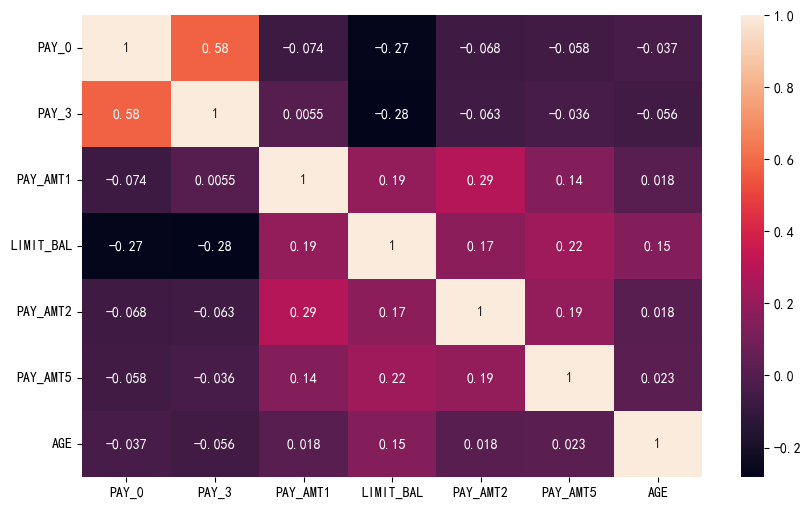

In [67]:
we.plot_corr(data_train[col_result])

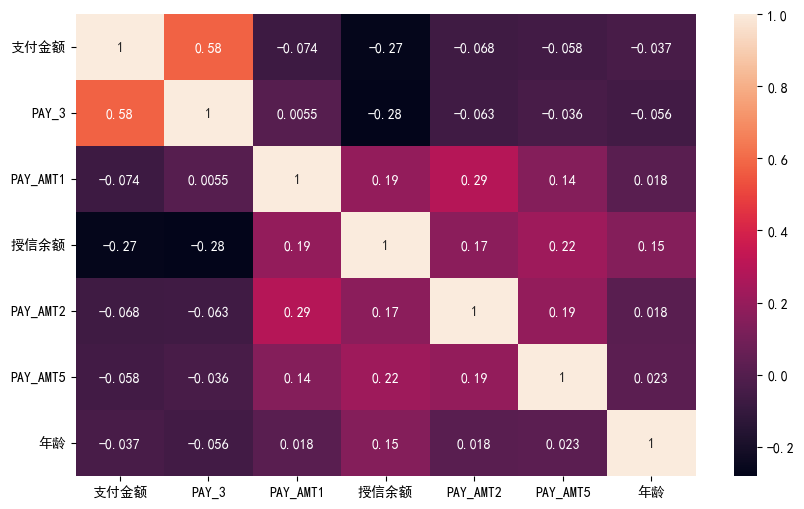

In [68]:
# 相关性表，添加中文
we.plot_corr(data_train[col_result],data_dict = data_dict)

In [69]:
# 批量计算WoE，使用默认的分箱方法
we.data_iv(data_train)  

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.8647
7,PAY_2,0.5272
8,PAY_3,0.4134
9,PAY_4,0.3510
10,PAY_5,0.3213
11,PAY_6,0.2759
18,PAY_AMT1,0.1798
1,LIMIT_BAL,0.1706
19,PAY_AMT2,0.1688
20,PAY_AMT3,0.1308


In [70]:
# 批量计算IV，等频分箱，分为5箱
we.data_iv(data_train,qcut=5)  

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.8647
7,PAY_2,0.5223
8,PAY_3,0.4099
9,PAY_4,0.3472
10,PAY_5,0.3170
11,PAY_6,0.2706
18,PAY_AMT1,0.1488
1,LIMIT_BAL,0.1429
19,PAY_AMT2,0.1378
20,PAY_AMT3,0.1157


In [71]:
# 根据分箱后的数据，批量计算iv
we.data_iv(data_train_discrete[col_result+['y']])

  0%|          | 0/7 [00:00<?, ?it/s]

,Name,IV
0,PAY_0,0.8647
1,PAY_3,0.4134
2,PAY_AMT1,0.1775
3,LIMIT_BAL,0.1669
4,PAY_AMT2,0.1640
5,PAY_AMT5,0.0962
6,AGE,0.0203


## 评分卡开发

In [72]:
# 按照默认参数，开发评分卡
# 默认基础分为600，PDO=50

# 输入训练集数据 和 调整后分箱，开发评分卡
scorecard = we.get_scorecard(data_train[col_result + ['y']] ,data_bins)
scorecard

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,Intercept,Coef,Base Score,Score
0,1,PAY_0,continuous,1,missing,"[-inf, -0.5, 0.5, 1.5, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.86,-1.27,0.81,600,-0.00
1,1,PAY_0,continuous,2,"(-inf, -0.5]","[-inf, -0.5, 0.5, 1.5, inf]",6288,977,5311,27.95%,19.79%,30.24%,15.54%,-0.42,0.04,0.86,-1.27,0.81,600,24.00
2,1,PAY_0,continuous,3,"(-0.5, 0.5]","[-inf, -0.5, 0.5, 1.5, inf]",11109,1417,9692,49.37%,28.71%,55.18%,12.76%,-0.65,0.17,0.86,-1.27,0.81,600,38.00
3,1,PAY_0,continuous,4,"(0.5, 1.5]","[-inf, -0.5, 0.5, 1.5, inf]",2767,921,1846,12.30%,18.66%,10.51%,33.29%,0.57,0.05,0.86,-1.27,0.81,600,-33.00
4,1,PAY_0,continuous,5,"(1.5, inf]","[-inf, -0.5, 0.5, 1.5, inf]",2336,1621,715,10.38%,32.84%,4.07%,69.39%,2.09,0.60,0.86,-1.27,0.81,600,-121.00
5,2,PAY_3,continuous,1,missing,"[-inf, -1.5, -0.5, 1.5, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.41,-1.27,0.40,600,-0.00
6,2,PAY_3,continuous,2,"(-inf, -1.5]","[-inf, -1.5, -0.5, 1.5, inf]",3060,567,2493,13.60%,11.49%,14.19%,18.53%,-0.21,0.01,0.41,-1.27,0.40,600,6.00
7,2,PAY_3,continuous,3,"(-1.5, -0.5]","[-inf, -1.5, -0.5, 1.5, inf]",4446,688,3758,19.76%,13.94%,21.40%,15.47%,-0.43,0.03,0.41,-1.27,0.40,600,12.00
8,2,PAY_3,continuous,4,"(-0.5, 1.5]","[-inf, -1.5, -0.5, 1.5, inf]",11860,2047,9813,52.71%,41.47%,55.87%,17.26%,-0.30,0.04,0.41,-1.27,0.40,600,9.00
9,2,PAY_3,continuous,5,"(1.5, inf]","[-inf, -1.5, -0.5, 1.5, inf]",3134,1634,1500,13.93%,33.10%,8.54%,52.14%,1.35,0.33,0.41,-1.27,0.40,600,-39.00


In [73]:
# 设置数据精度，并返回逻辑回归模型的详细内容
scorecard,lr,a,b = we.get_scorecard(data_train[col_result + ['y']] ,data_bins,precision=4,return_lr=True)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [74]:
# 查看逻辑回归模型的详细内容
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22492
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 Jul 2023   Pseudo R-squ.:                  0.1676
Time:                        10:33:26   Log-Likelihood:                -9853.2
converged:                       True   LL-Null:                       -11838.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2679      0.018    -69.681      0.000      -1.304      -1.232
PAY_0          0.8053      0.021     39.281      0.000       0.765       0.845
PAY_3          0.4022      0.031     12.895      0.000       0.341       0.463
PAY_AMT1       0.3054      0.048      6.304      0.000       0.210       0.400
LIMIT_BAL      0.4220      0.048      8.844      0.000       0.328       0.515
PAY_AMT2       0.1448      0.053      2.740      0.006       0.041       0.248
PAY_AMT5       0.3587      0.068      5.260      0.000       0.225       0.492
AGE            0.3533      0.128      2.762      0.006       0.103       0.604
==============================================================================
"""

## 获取模型变量的IV表单

In [75]:
#获取模型变量的IV表单
we.model_iv(data_train_discrete[col_result+['y']],precision=4)  

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

C:\Users\about\Desktop\github\westat\westat\model\get_model_iv.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.rename(


,No.,Name,Bins No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,1,PAY_0,1,missing,0,0,0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000,0.0000,0.8648
1,1,PAY_0,2,"(-inf, -0.5]",6288,977,5311,27.9467%,19.7934%,30.2380%,15.5375%,-0.4238,0.0443,0.8648
2,1,PAY_0,3,"(-0.5, 0.5]",11109,1417,9692,49.3733%,28.7075%,55.1811%,12.7554%,-0.6535,0.1730,0.8648
3,1,PAY_0,4,"(0.5, 1.5]",2767,921,1846,12.2978%,18.6588%,10.5101%,33.2851%,0.5740,0.0468,0.8648
4,1,PAY_0,5,"(1.5, inf]",2336,1621,715,10.3822%,32.8404%,4.0708%,69.3921%,2.0878,0.6007,0.8648
5,2,PAY_3,1,missing,0,0,0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000,0.0000,0.4134
6,2,PAY_3,2,"(-inf, -1.5]",3060,567,2493,13.6000%,11.4870%,14.1938%,18.5294%,-0.2116,0.0057,0.4134
7,2,PAY_3,3,"(-1.5, -0.5]",4446,688,3758,19.7600%,13.9384%,21.3960%,15.4746%,-0.4286,0.0320,0.4134
8,2,PAY_3,4,"(-0.5, 1.5]",11860,2047,9813,52.7111%,41.4708%,55.8700%,17.2597%,-0.2980,0.0429,0.4134
9,2,PAY_3,5,"(1.5, inf]",3134,1634,1500,13.9289%,33.1037%,8.5402%,52.1378%,1.3549,0.3328,0.4134


In [76]:
#获取模型变量的IV表单，并检查单调性
we.view_model_iv(data_train_discrete[col_result+['y']],precision=4)  

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

C:\Users\about\Desktop\github\westat\westat\model\get_model_iv.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.rename(


,No.,Name,Bins No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,1,PAY_0,1,missing,0,0,0,0.0000%,0.0000%,0.0000%,0.0000%,0.000000,0.000000,0.864800,0.000000
1,1,PAY_0,2,"(-inf, -0.5]",6288,977,5311,27.9467%,19.7934%,30.2380%,15.5375%,-0.423800,0.044300,0.864800,-0.423800
2,1,PAY_0,3,"(-0.5, 0.5]",11109,1417,9692,49.3733%,28.7075%,55.1811%,12.7554%,-0.653500,0.173000,0.864800,-0.653500
3,1,PAY_0,4,"(0.5, 1.5]",2767,921,1846,12.2978%,18.6588%,10.5101%,33.2851%,0.574000,0.046800,0.864800,0.574000
4,1,PAY_0,5,"(1.5, inf]",2336,1621,715,10.3822%,32.8404%,4.0708%,69.3921%,2.087800,0.600700,0.864800,2.087800
5,2,PAY_3,1,missing,0,0,0,0.0000%,0.0000%,0.0000%,0.0000%,0.000000,0.000000,0.413400,0.000000
6,2,PAY_3,2,"(-inf, -1.5]",3060,567,2493,13.6000%,11.4870%,14.1938%,18.5294%,-0.211600,0.005700,0.413400,-0.211600
7,2,PAY_3,3,"(-1.5, -0.5]",4446,688,3758,19.7600%,13.9384%,21.3960%,15.4746%,-0.428600,0.032000,0.413400,-0.428600
8,2,PAY_3,4,"(-0.5, 1.5]",11860,2047,9813,52.7111%,41.4708%,55.8700%,17.2597%,-0.298000,0.042900,0.413400,-0.298000
9,2,PAY_3,5,"(1.5, inf]",3134,1634,1500,13.9289%,33.1037%,8.5402%,52.1378%,1.354900,0.332800,0.413400,1.354900


## 检查VIF

In [77]:
we.get_vif(data_train_woe,col_result,return_data=True)

(1.57,
    variables    VIF
 0      PAY_0 1.4000
 1      PAY_3 1.4700
 2   PAY_AMT1 1.4600
 3  LIMIT_BAL 1.2500
 4   PAY_AMT2 1.5700
 5   PAY_AMT5 1.3900
 6        AGE 1.0700)

In [78]:
# 查看评分卡模型的参数
print('a:',a,'','b:',b)

a: 508.4396430011438  b: 72.13475204444818


## 预测模型分数

In [79]:
# 预测训练集模型分数
data_train_score = we.get_predict_score(data_train,scorecard)
data_train_score

  0%|          | 0/7 [00:00<?, ?it/s]

,PAY_0,PAY_0_Score,PAY_3,PAY_3_Score,PAY_AMT1,PAY_AMT1_Score,LIMIT_BAL,LIMIT_BAL_Score,PAY_AMT2,PAY_AMT2_Score,PAY_AMT5,PAY_AMT5_Score,AGE,AGE_Score,y,Score,Proba
0,-1,25.0000,-1,12.0000,1671.0000,-0.0000,120000.0000,-5.0000,380.0000,-1.0000,3000.0000,2.0000,27,2.0000,0,635.0000,0.1500
1,-2,25.0000,-2,6.0000,1468.0000,-0.0000,200000.0000,11.0000,2321.0000,1.0000,3963.0000,2.0000,26,2.0000,0,647.0000,0.1300
2,0,38.0000,0,9.0000,4038.0000,1.0000,80000.0000,-5.0000,3199.0000,1.0000,2055.0000,2.0000,24,-6.0000,0,640.0000,0.1400
3,0,38.0000,0,9.0000,1596.0000,-0.0000,20000.0000,-21.0000,2000.0000,1.0000,1600.0000,-2.0000,27,2.0000,0,627.0000,0.1600
4,0,38.0000,0,9.0000,3000.0000,1.0000,90000.0000,-5.0000,2000.0000,1.0000,2000.0000,2.0000,39,1.0000,0,647.0000,0.1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,2,-121.0000,0,9.0000,3000.0000,1.0000,50000.0000,-5.0000,2525.0000,1.0000,2000.0000,2.0000,27,2.0000,1,489.0000,0.5700
22496,-1,25.0000,-1,12.0000,0.0000,-15.0000,210000.0000,11.0000,358.0000,-1.0000,102.0000,-2.0000,48,-5.0000,0,625.0000,0.1700
22497,1,-33.0000,-1,12.0000,0.0000,-15.0000,390000.0000,22.0000,1266.0000,-1.0000,0.0000,-10.0000,34,4.0000,0,579.0000,0.2700
22498,0,38.0000,0,9.0000,1700.0000,-0.0000,30000.0000,-21.0000,1600.0000,-1.0000,500.0000,-2.0000,23,-6.0000,0,617.0000,0.1800


In [80]:
# 预测测试集模型分数
data_test_score = we.get_predict_score(data_test,scorecard)
data_test_score

  0%|          | 0/7 [00:00<?, ?it/s]

,PAY_0,PAY_0_Score,PAY_3,PAY_3_Score,PAY_AMT1,PAY_AMT1_Score,LIMIT_BAL,LIMIT_BAL_Score,PAY_AMT2,PAY_AMT2_Score,PAY_AMT5,PAY_AMT5_Score,AGE,AGE_Score,y,Score,Proba
0,-2,25.0000,-2,6.0000,0.0000,-15.0000,400000.0000,22.0000,0.0000,-6.0000,0.0000,-10.0000,34,4.0000,0,629.0000,0.1600
1,0,38.0000,0,9.0000,2600.0000,1.0000,80000.0000,-5.0000,4300.0000,1.0000,2000.0000,2.0000,34,4.0000,0,653.0000,0.1200
2,1,-33.0000,-1,12.0000,0.0000,-15.0000,200000.0000,11.0000,2317.0000,1.0000,14053.0000,18.0000,49,-5.0000,0,592.0000,0.2500
3,-1,25.0000,-1,12.0000,1087.0000,-0.0000,20000.0000,-21.0000,1140.0000,-1.0000,800.0000,-2.0000,41,1.0000,0,617.0000,0.1900
4,2,-121.0000,0,9.0000,5000.0000,10.0000,70000.0000,-5.0000,3000.0000,1.0000,5000.0000,8.0000,36,1.0000,0,506.0000,0.5200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,38.0000,0,9.0000,1128.0000,-0.0000,500000.0000,22.0000,1000.0000,-1.0000,236.0000,-2.0000,38,1.0000,0,670.0000,0.1000
7496,0,38.0000,0,9.0000,8080.0000,10.0000,110000.0000,-5.0000,14298.0000,4.0000,1953.0000,2.0000,28,2.0000,0,663.0000,0.1100
7497,0,38.0000,0,9.0000,4539.0000,1.0000,150000.0000,5.0000,4218.0000,1.0000,3408.0000,2.0000,47,-5.0000,0,654.0000,0.1200
7498,0,38.0000,0,9.0000,5059.0000,10.0000,140000.0000,5.0000,14659.0000,4.0000,5000.0000,8.0000,42,1.0000,0,678.0000,0.0900


## 计算AUC 和 KS

  0%|          | 0/7 [00:00<?, ?it/s]

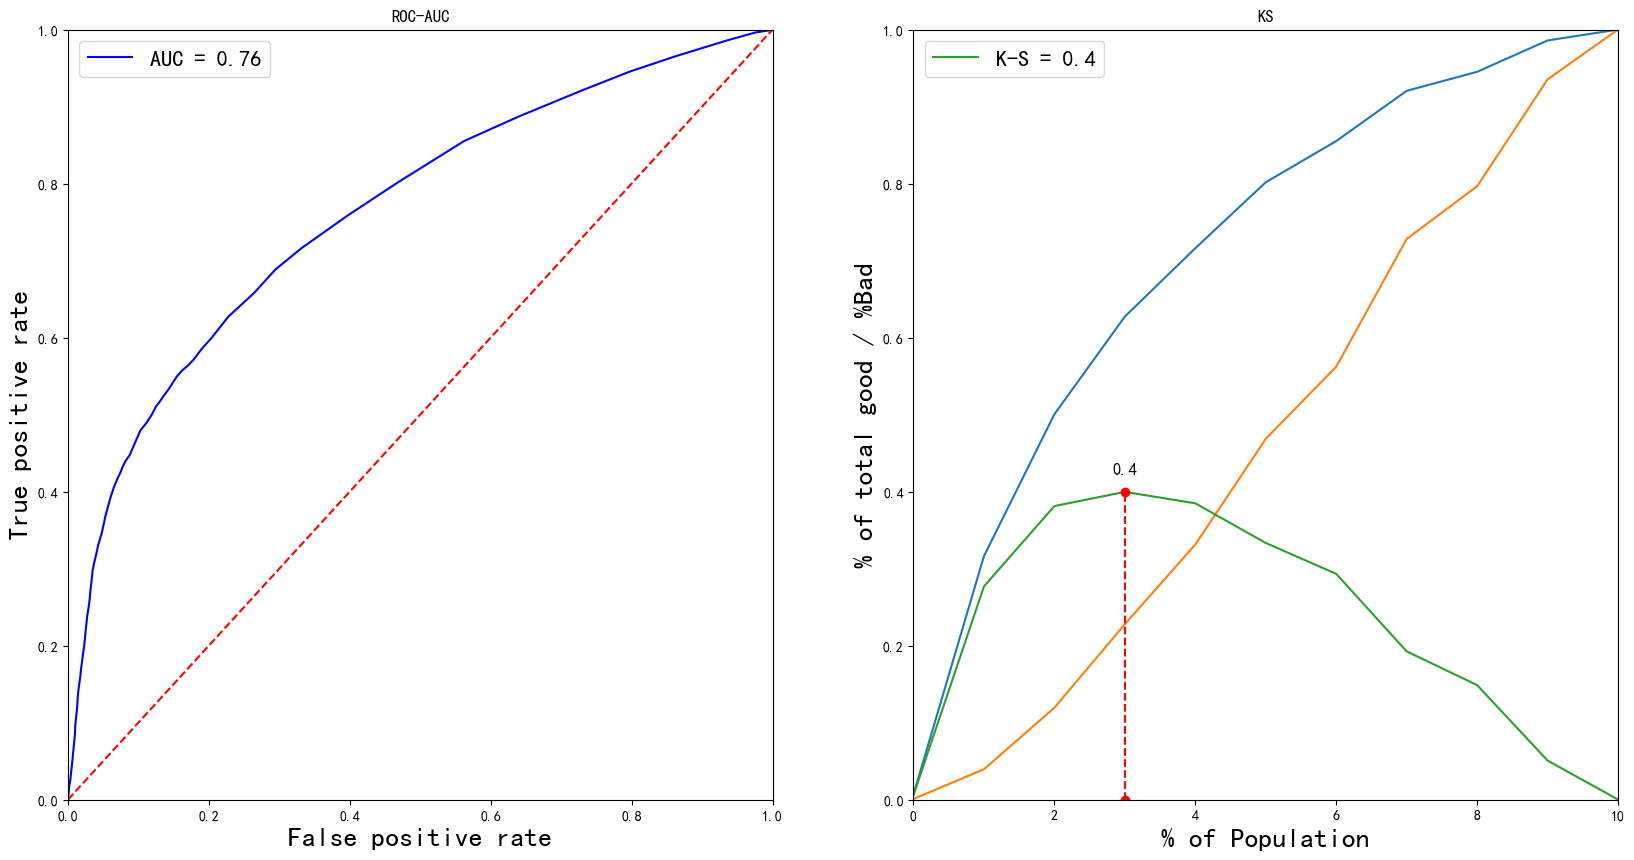

In [81]:
we.plot_roc_ks(data_train,scorecard)

  0%|          | 0/7 [00:00<?, ?it/s]

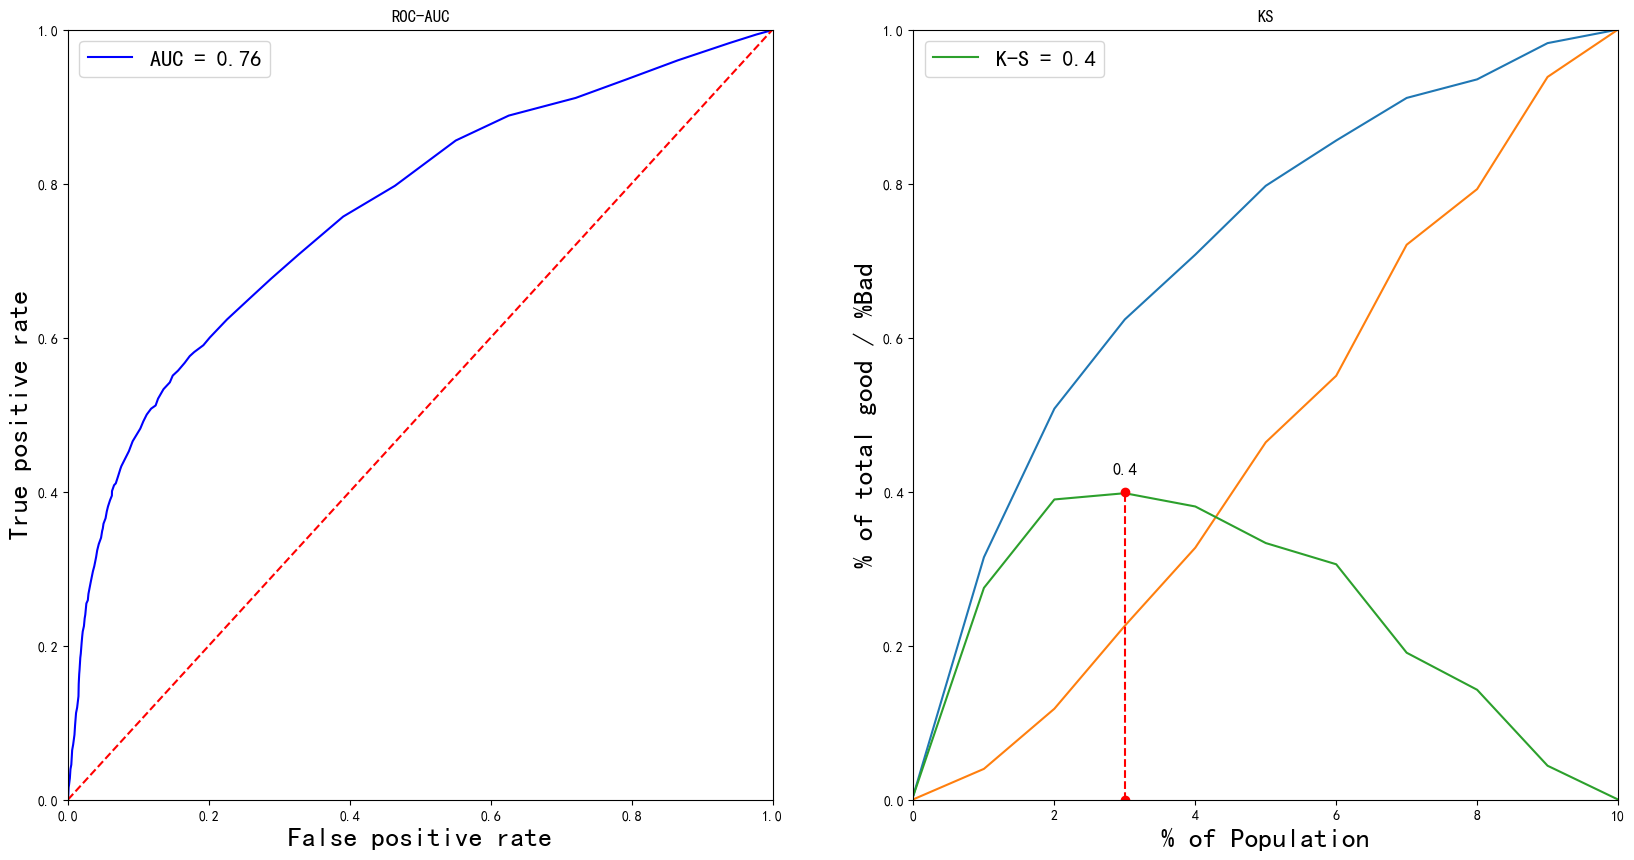

In [82]:
we.plot_roc_ks(data_test,scorecard)

## 根据 预测得分计算ks

  0%|          | 0/7 [00:00<?, ?it/s]

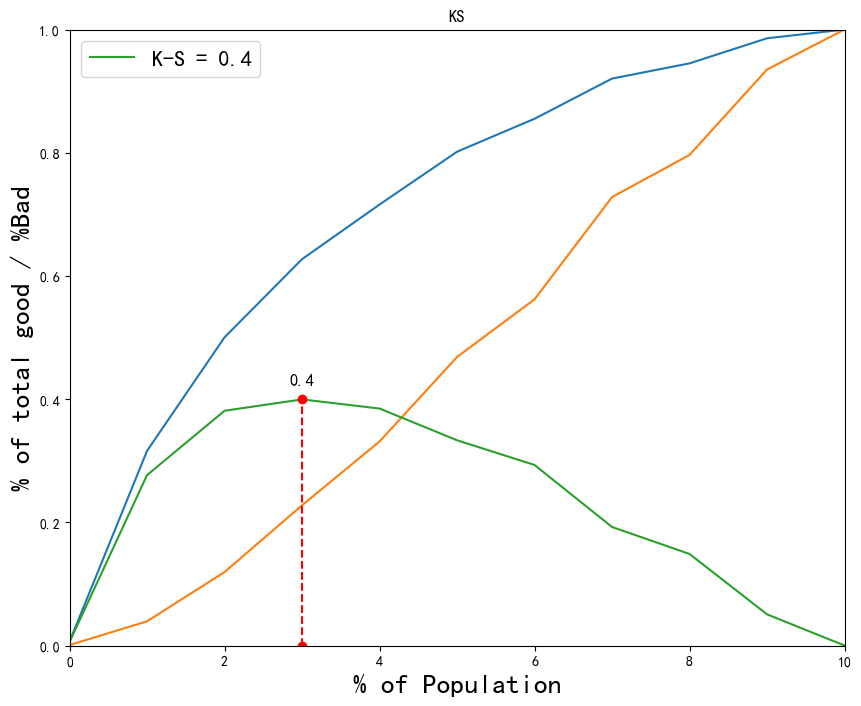

In [83]:
data_proba = we.get_predict_score(data_train,
                                       scorecard,
                                       init_score=600,
                                       pdo=50,
                                       odds=0,
                                       target='y',
                                       precision=2)


we.plot_ks(data_train,data_proba)

  0%|          | 0/7 [00:00<?, ?it/s]

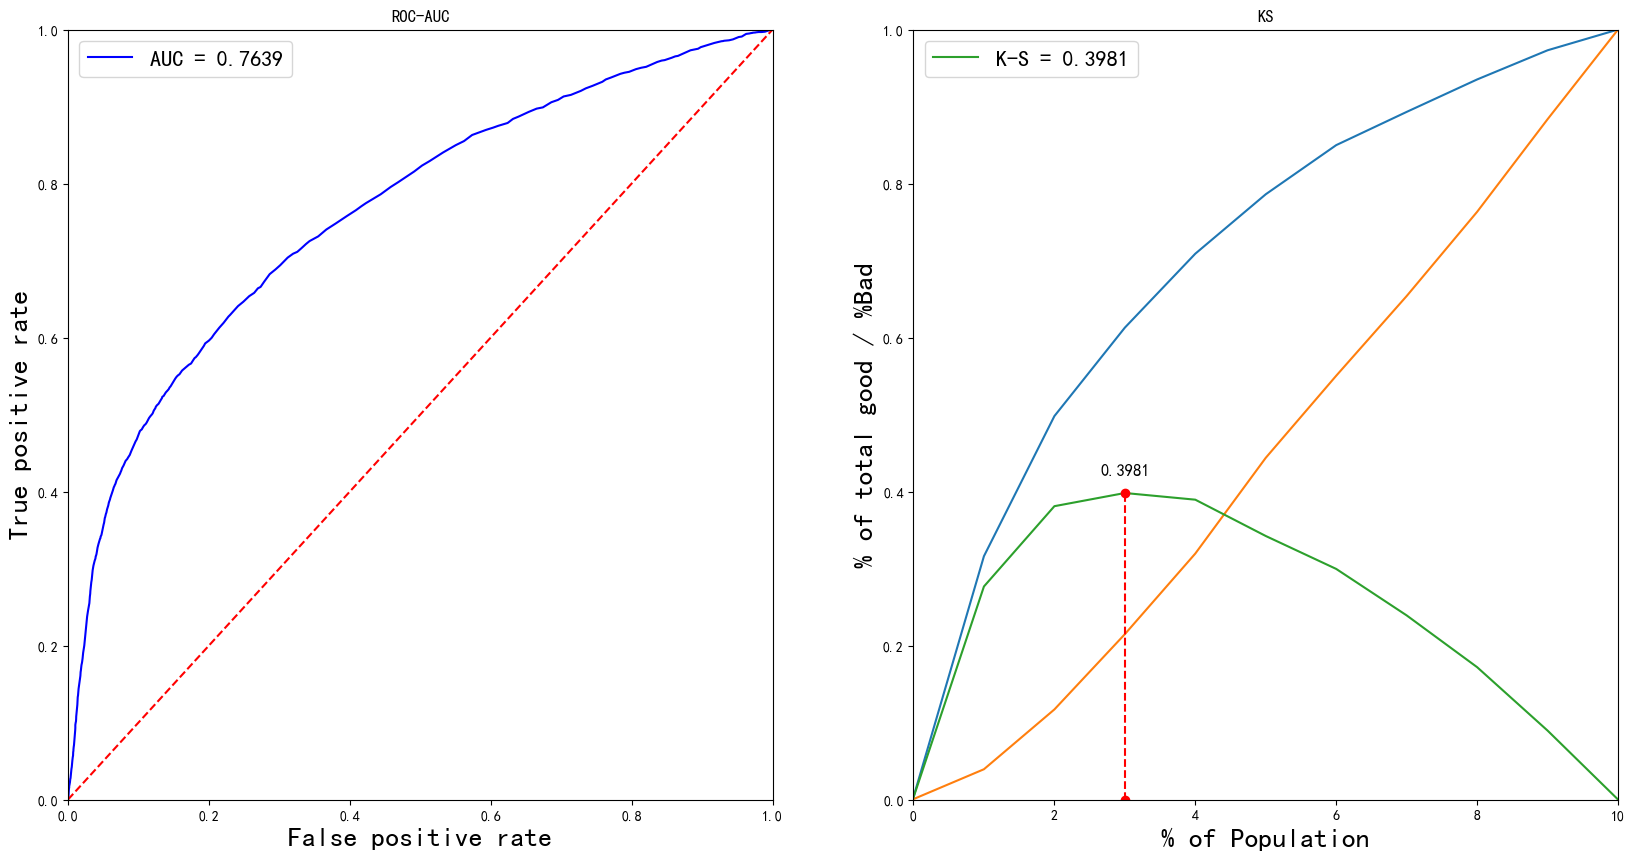

,No.,fpr,tpr,thresholds,ks
0,1,0.0006,0.0032,0.8525,0.0027
1,2,0.0393,0.3160,0.5468,0.2767
2,3,0.1170,0.4980,0.3108,0.3810
3,4,0.2148,0.6128,0.1924,0.3981
4,5,0.3195,0.7089,0.1603,0.3894
5,6,0.4438,0.7861,0.1391,0.3423
6,7,0.5504,0.8499,0.1279,0.2995
7,8,0.6539,0.8930,0.1146,0.2391
8,9,0.7633,0.9352,0.1000,0.1719
9,10,0.8835,0.9731,0.0839,0.0895


In [84]:
# 计算auc 和 ks，并返回 ks 结果数据
we.plot_roc_ks(data_train,scorecard,return_data=True,precision=4)

## AUC 计算

In [85]:
#根据训练集和评分卡计算auc
we.get_auc_by_card(data_train,scorecard)

  0%|          | 0/7 [00:00<?, ?it/s]

0.76

In [86]:
#根据训练集预测得分，计算auc
we.get_auc(data_train_score)

0.76

## KS 计算

In [87]:
#根据训练集和评分卡计算ks
we.get_ks_by_card(data_train,scorecard)

  0%|          | 0/7 [00:00<?, ?it/s]

0.4

In [88]:
#根据训练集预测得分，计算ks
we.get_ks(data_train_score)

0.4

In [89]:
#根据训练集预测得分，计算ks，并返回数据
ks,ks_data = we.get_ks(data_train_score,return_data=True)
ks_data

,No.,Proba,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%CumBad,%CumGood,KS
0,1,"(0.049, 0.08]",2599,172,2427,11.55%,3.48%,13.82%,6.62%,3.48%,13.82%,0.1000
1,2,"(0.08, 0.1]",2572,221,2351,11.43%,4.48%,13.39%,8.59%,7.96%,27.20%,0.1900
2,3,"(0.1, 0.11]",1718,165,1553,7.64%,3.34%,8.84%,9.60%,11.30%,36.05%,0.2500
3,4,"(0.11, 0.13]",3426,421,3005,15.23%,8.53%,17.11%,12.29%,19.83%,53.15%,0.3300
4,5,"(0.13, 0.14]",1489,216,1273,6.62%,4.38%,7.25%,14.51%,24.21%,60.40%,0.3600
5,6,"(0.14, 0.16]",2127,343,1784,9.45%,6.95%,10.16%,16.13%,31.16%,70.56%,0.3900
6,7,"(0.16, 0.19]",2028,438,1590,9.01%,8.87%,9.05%,21.60%,40.03%,79.61%,0.4000
7,8,"(0.19, 0.31]",2166,544,1622,9.63%,11.02%,9.23%,25.12%,51.05%,88.85%,0.3800
8,9,"(0.31, 0.55]",2207,899,1308,9.81%,18.21%,7.45%,40.73%,69.27%,96.29%,0.2700
9,10,"(0.55, 0.85]",2168,1517,651,9.64%,30.73%,3.71%,69.97%,100.00%,100.00%,0.0000


## 查看评分卡分数分布 和 提升度

In [90]:
# 查看训练集评分卡分数分布 和 提升度
we.score_dist(data_train_score)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 495.0]",2251,1560,691,10.00%,31.60%,3.93%,69.30%,21.94%,69.30%,10.00%,6.9300
1,2,"(495.0, 566.0]",2262,898,1364,10.05%,18.19%,7.77%,39.70%,21.94%,54.46%,20.06%,2.7200
2,3,"(566.0, 612.0]",2284,567,1717,10.15%,11.49%,9.78%,24.82%,21.94%,44.50%,30.21%,1.4700
3,4,"(612.0, 628.0]",2313,474,1839,10.28%,9.60%,10.47%,20.49%,21.94%,38.41%,40.49%,0.9500
4,5,"(628.0, 640.0]",2565,381,2184,11.40%,7.72%,12.43%,14.85%,21.94%,33.23%,51.89%,0.6400
5,6,"(640.0, 647.0]",2187,315,1872,9.72%,6.38%,10.66%,14.40%,21.94%,30.26%,61.61%,0.4900
6,7,"(647.0, 656.0]",2031,213,1818,9.03%,4.32%,10.35%,10.49%,21.94%,27.74%,70.64%,0.3900
7,8,"(656.0, 667.0]",2129,208,1921,9.46%,4.21%,10.94%,9.77%,21.94%,25.61%,80.10%,0.3200
8,9,"(667.0, 681.0]",2299,187,2112,10.22%,3.79%,12.02%,8.13%,21.94%,23.64%,90.32%,0.2600
9,10,"(681.0, inf]",2179,133,2046,9.68%,2.69%,11.65%,6.10%,21.94%,21.94%,100.00%,0.2200


In [91]:
# 查看训练集评分卡分数分布 和 提升度，分为5组，查看提升度
we.score_dist(data_train_score,qcut=5)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 566.0]",4513,2458,2055,20.06%,49.80%,11.70%,54.46%,21.94%,54.46%,20.06%,2.7200
1,2,"(566.0, 628.0]",4597,1041,3556,20.43%,21.09%,20.25%,22.65%,21.94%,38.41%,40.49%,0.9500
2,3,"(628.0, 647.0]",4752,696,4056,21.12%,14.10%,23.09%,14.65%,21.94%,30.26%,61.61%,0.4900
3,4,"(647.0, 667.0]",4160,421,3739,18.49%,8.53%,21.29%,10.12%,21.94%,25.61%,80.10%,0.3200
4,5,"(667.0, inf]",4478,320,4158,19.90%,6.48%,23.67%,7.15%,21.94%,21.94%,100.00%,0.2200


In [92]:
# 查看训练集评分卡分数分布 和 提升度，分为5组，查看提升度
we.view_score_dist(data_train_score,qcut=5)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 566.0]",4513,2458,2055,20.06%,49.80%,11.70%,54.46%,21.94%,54.46%,20.06%,2.720000,2.720000
1,2,"(566.0, 628.0]",4597,1041,3556,20.43%,21.09%,20.25%,22.65%,21.94%,38.41%,40.49%,0.950000,0.950000
2,3,"(628.0, 647.0]",4752,696,4056,21.12%,14.10%,23.09%,14.65%,21.94%,30.26%,61.61%,0.490000,0.490000
3,4,"(647.0, 667.0]",4160,421,3739,18.49%,8.53%,21.29%,10.12%,21.94%,25.61%,80.10%,0.320000,0.320000
4,5,"(667.0, inf]",4478,320,4158,19.90%,6.48%,23.67%,7.15%,21.94%,21.94%,100.00%,0.220000,0.220000


In [93]:
# 查看训练集评分卡分数分布 和 提升度，分为5组，查看提升度
we.view_score_dist(data_train_score,qcut=5,color='green')

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 566.0]",4513,2458,2055,20.06%,49.80%,11.70%,54.46%,21.94%,54.46%,20.06%,2.720000,2.720000
1,2,"(566.0, 628.0]",4597,1041,3556,20.43%,21.09%,20.25%,22.65%,21.94%,38.41%,40.49%,0.950000,0.950000
2,3,"(628.0, 647.0]",4752,696,4056,21.12%,14.10%,23.09%,14.65%,21.94%,30.26%,61.61%,0.490000,0.490000
3,4,"(647.0, 667.0]",4160,421,3739,18.49%,8.53%,21.29%,10.12%,21.94%,25.61%,80.10%,0.320000,0.320000
4,5,"(667.0, inf]",4478,320,4158,19.90%,6.48%,23.67%,7.15%,21.94%,21.94%,100.00%,0.220000,0.220000


In [94]:
# 查看训练集评分卡分数分布 和 提升度，分为5组，查看提升度
we.view_score_dist(data_train_score,qcut=5,color='#02B057')

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 566.0]",4513,2458,2055,20.06%,49.80%,11.70%,54.46%,21.94%,54.46%,20.06%,2.720000,2.720000
1,2,"(566.0, 628.0]",4597,1041,3556,20.43%,21.09%,20.25%,22.65%,21.94%,38.41%,40.49%,0.950000,0.950000
2,3,"(628.0, 647.0]",4752,696,4056,21.12%,14.10%,23.09%,14.65%,21.94%,30.26%,61.61%,0.490000,0.490000
3,4,"(647.0, 667.0]",4160,421,3739,18.49%,8.53%,21.29%,10.12%,21.94%,25.61%,80.10%,0.320000,0.320000
4,5,"(667.0, inf]",4478,320,4158,19.90%,6.48%,23.67%,7.15%,21.94%,21.94%,100.00%,0.220000,0.220000


In [95]:
# 查看训练集评分卡分数分布 和 提升度,  标题显示为中文
we.score_dist(data_train_score,language='cn')

,序号,分数区间,#合计,#坏,#好,%合计,%坏,%好,%坏件率,%随机坏件率,%累计坏,%累计合计,提升度
0,1,"(-inf, 495.0]",2251,1560,691,10.00%,31.60%,3.93%,69.30%,21.94%,69.30%,10.00%,6.9300
1,2,"(495.0, 566.0]",2262,898,1364,10.05%,18.19%,7.77%,39.70%,21.94%,54.46%,20.06%,2.7200
2,3,"(566.0, 612.0]",2284,567,1717,10.15%,11.49%,9.78%,24.82%,21.94%,44.50%,30.21%,1.4700
3,4,"(612.0, 628.0]",2313,474,1839,10.28%,9.60%,10.47%,20.49%,21.94%,38.41%,40.49%,0.9500
4,5,"(628.0, 640.0]",2565,381,2184,11.40%,7.72%,12.43%,14.85%,21.94%,33.23%,51.89%,0.6400
5,6,"(640.0, 647.0]",2187,315,1872,9.72%,6.38%,10.66%,14.40%,21.94%,30.26%,61.61%,0.4900
6,7,"(647.0, 656.0]",2031,213,1818,9.03%,4.32%,10.35%,10.49%,21.94%,27.74%,70.64%,0.3900
7,8,"(656.0, 667.0]",2129,208,1921,9.46%,4.21%,10.94%,9.77%,21.94%,25.61%,80.10%,0.3200
8,9,"(667.0, 681.0]",2299,187,2112,10.22%,3.79%,12.02%,8.13%,21.94%,23.64%,90.32%,0.2600
9,10,"(681.0, inf]",2179,133,2046,9.68%,2.69%,11.65%,6.10%,21.94%,21.94%,100.00%,0.2200


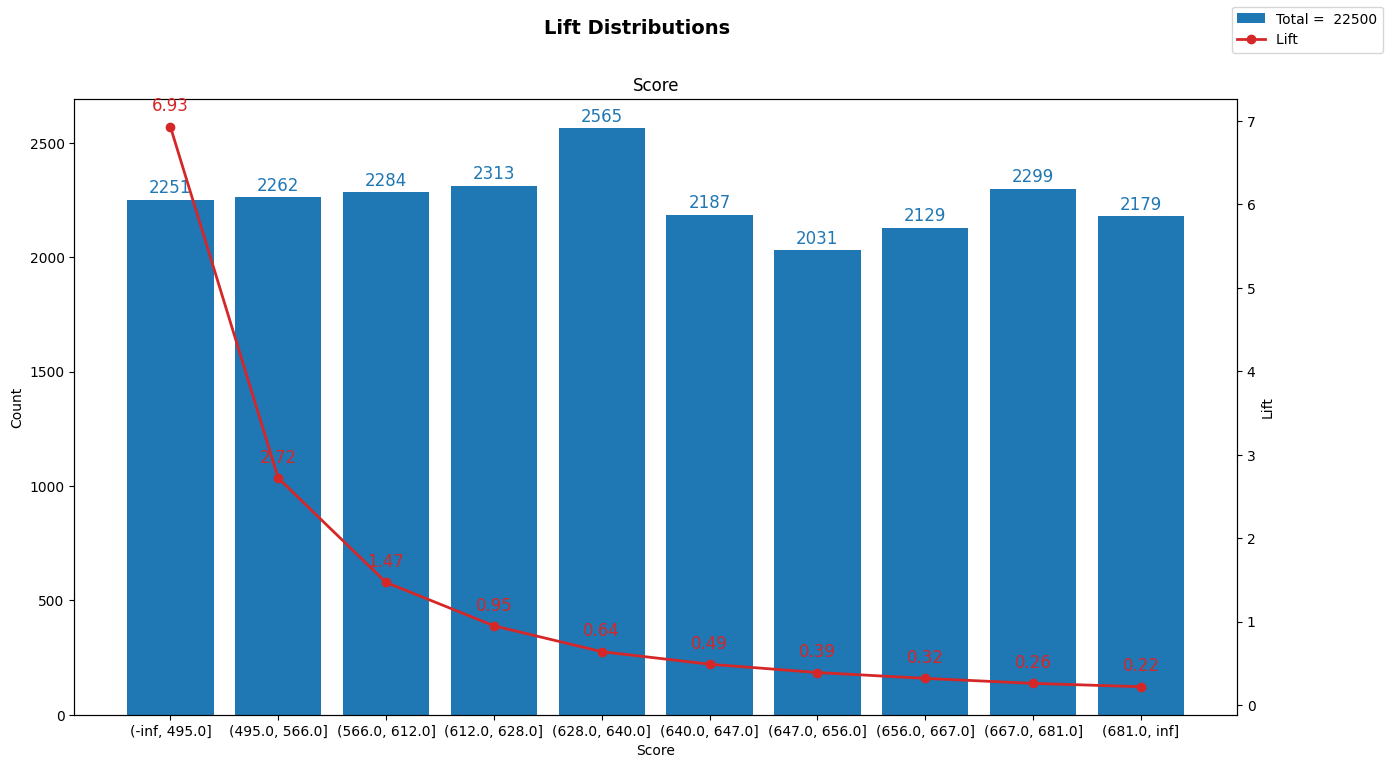

In [96]:
# 绘制提升度图    
we.plot_lift(data_train_score)

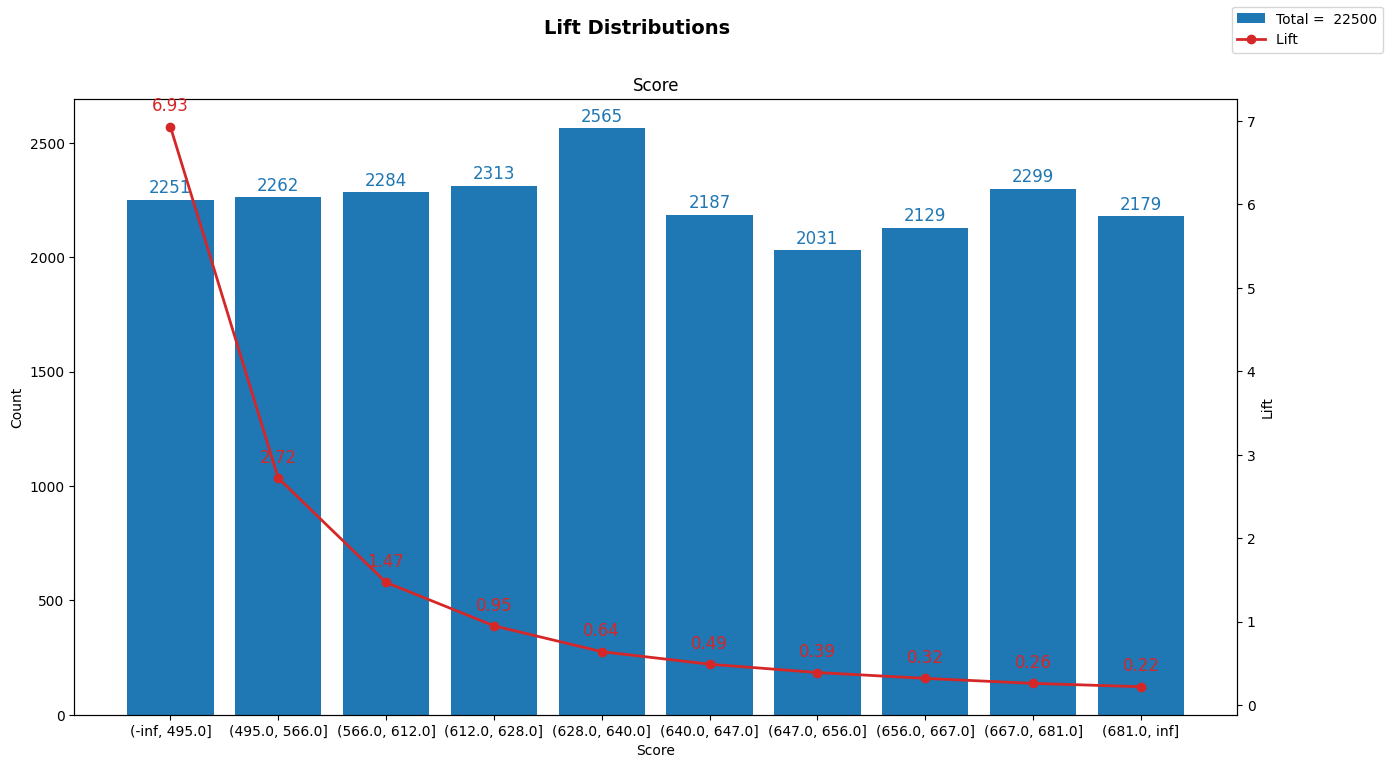

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 495.0]",2251,1560,691,10.00%,31.60%,3.93%,69.30%,21.94%,69.30%,10.00%,6.9300
1,2,"(495.0, 566.0]",2262,898,1364,10.05%,18.19%,7.77%,39.70%,21.94%,54.46%,20.06%,2.7200
2,3,"(566.0, 612.0]",2284,567,1717,10.15%,11.49%,9.78%,24.82%,21.94%,44.50%,30.21%,1.4700
3,4,"(612.0, 628.0]",2313,474,1839,10.28%,9.60%,10.47%,20.49%,21.94%,38.41%,40.49%,0.9500
4,5,"(628.0, 640.0]",2565,381,2184,11.40%,7.72%,12.43%,14.85%,21.94%,33.23%,51.89%,0.6400
5,6,"(640.0, 647.0]",2187,315,1872,9.72%,6.38%,10.66%,14.40%,21.94%,30.26%,61.61%,0.4900
6,7,"(647.0, 656.0]",2031,213,1818,9.03%,4.32%,10.35%,10.49%,21.94%,27.74%,70.64%,0.3900
7,8,"(656.0, 667.0]",2129,208,1921,9.46%,4.21%,10.94%,9.77%,21.94%,25.61%,80.10%,0.3200
8,9,"(667.0, 681.0]",2299,187,2112,10.22%,3.79%,12.02%,8.13%,21.94%,23.64%,90.32%,0.2600
9,10,"(681.0, inf]",2179,133,2046,9.68%,2.69%,11.65%,6.10%,21.94%,21.94%,100.00%,0.2200


In [97]:
# 绘制提升度图，并输出提升度表格
we.plot_lift(data_train_score,return_data=True)

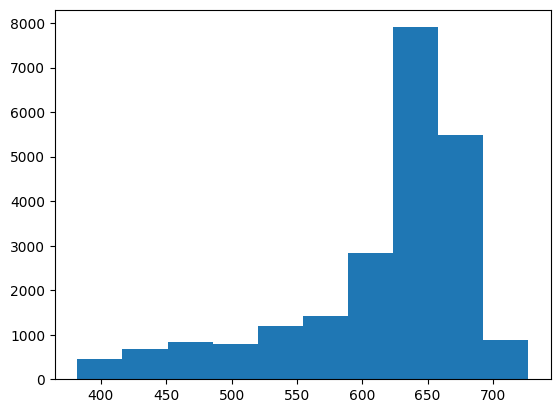

In [98]:
# 查看训练集分数分布

import matplotlib.pyplot as plt
plt.style.use('default')
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.hist(data_train_score['Score'] )
plt.show()

## 模型稳定型 PSI计算

In [99]:
data_train_score = we.get_predict_score(data_train,scorecard)
data_test_score = we.get_predict_score(data_test,scorecard)

# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
we.get_psi(data_train_score,data_test_score,precision=4)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI
0,1,Score,"(-inf, 495.0]",2982.0000,2251.0000,731.0000,9.9400%,10.0044%,9.7467%,0.0001
1,2,Score,"(495.0, 566.0]",3018.0000,2262.0000,756.0000,10.0600%,10.0533%,10.0800%,0.0000
2,3,Score,"(566.0, 612.0]",2964.0000,2284.0000,680.0000,9.8800%,10.1511%,9.0667%,0.0012
3,4,Score,"(612.0, 628.0]",2968.0000,2313.0000,655.0000,9.8933%,10.2800%,8.7333%,0.0025
4,5,Score,"(628.0, 640.0]",3367.0000,2565.0000,802.0000,11.2233%,11.4000%,10.6933%,0.0005
5,6,Score,"(640.0, 647.0]",2828.0000,2187.0000,641.0000,9.4267%,9.7200%,8.5467%,0.0015
6,7,Score,"(647.0, 656.0]",2804.0000,2031.0000,773.0000,9.3467%,9.0267%,10.3067%,0.0017
7,8,Score,"(656.0, 667.0]",2866.0000,2129.0000,737.0000,9.5533%,9.4622%,9.8267%,0.0001
8,9,Score,"(667.0, 681.0]",3136.0000,2299.0000,837.0000,10.4533%,10.2178%,11.1600%,0.0008
9,10,Score,"(681.0, inf]",3067.0000,2179.0000,888.0000,10.2233%,9.6844%,11.8400%,0.0043


In [100]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
we.view_psi(data_train_score,data_test_score)

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,PSI.
0,1,Score,"(-inf, 495.0]",2982.000000,2251.000000,731.000000,9.94%,10.00%,9.75%,0.000000,0.000000
1,2,Score,"(495.0, 566.0]",3018.000000,2262.000000,756.000000,10.06%,10.05%,10.08%,0.000000,0.000000
2,3,Score,"(566.0, 612.0]",2964.000000,2284.000000,680.000000,9.88%,10.15%,9.07%,0.000000,0.000000
3,4,Score,"(612.0, 628.0]",2968.000000,2313.000000,655.000000,9.89%,10.28%,8.73%,0.000000,0.000000
4,5,Score,"(628.0, 640.0]",3367.000000,2565.000000,802.000000,11.22%,11.40%,10.69%,0.000000,0.000000
5,6,Score,"(640.0, 647.0]",2828.000000,2187.000000,641.000000,9.43%,9.72%,8.55%,0.000000,0.000000
6,7,Score,"(647.0, 656.0]",2804.000000,2031.000000,773.000000,9.35%,9.03%,10.31%,0.000000,0.000000
7,8,Score,"(656.0, 667.0]",2866.000000,2129.000000,737.000000,9.55%,9.46%,9.83%,0.000000,0.000000
8,9,Score,"(667.0, 681.0]",3136.000000,2299.000000,837.000000,10.45%,10.22%,11.16%,0.000000,0.000000
9,10,Score,"(681.0, inf]",3067.000000,2179.000000,888.000000,10.22%,9.68%,11.84%,0.000000,0.000000


In [101]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
we.view_psi(data_train_score,data_test_score,color='green')

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,PSI.
0,1,Score,"(-inf, 495.0]",2982.000000,2251.000000,731.000000,9.94%,10.00%,9.75%,0.000000,0.000000
1,2,Score,"(495.0, 566.0]",3018.000000,2262.000000,756.000000,10.06%,10.05%,10.08%,0.000000,0.000000
2,3,Score,"(566.0, 612.0]",2964.000000,2284.000000,680.000000,9.88%,10.15%,9.07%,0.000000,0.000000
3,4,Score,"(612.0, 628.0]",2968.000000,2313.000000,655.000000,9.89%,10.28%,8.73%,0.000000,0.000000
4,5,Score,"(628.0, 640.0]",3367.000000,2565.000000,802.000000,11.22%,11.40%,10.69%,0.000000,0.000000
5,6,Score,"(640.0, 647.0]",2828.000000,2187.000000,641.000000,9.43%,9.72%,8.55%,0.000000,0.000000
6,7,Score,"(647.0, 656.0]",2804.000000,2031.000000,773.000000,9.35%,9.03%,10.31%,0.000000,0.000000
7,8,Score,"(656.0, 667.0]",2866.000000,2129.000000,737.000000,9.55%,9.46%,9.83%,0.000000,0.000000
8,9,Score,"(667.0, 681.0]",3136.000000,2299.000000,837.000000,10.45%,10.22%,11.16%,0.000000,0.000000
9,10,Score,"(681.0, inf]",3067.000000,2179.000000,888.000000,10.22%,9.68%,11.84%,0.000000,0.000000


In [102]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
we.view_psi(data_train_score,data_test_score,color='#02B057')

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,PSI.
0,1,Score,"(-inf, 495.0]",2982.000000,2251.000000,731.000000,9.94%,10.00%,9.75%,0.000000,0.000000
1,2,Score,"(495.0, 566.0]",3018.000000,2262.000000,756.000000,10.06%,10.05%,10.08%,0.000000,0.000000
2,3,Score,"(566.0, 612.0]",2964.000000,2284.000000,680.000000,9.88%,10.15%,9.07%,0.000000,0.000000
3,4,Score,"(612.0, 628.0]",2968.000000,2313.000000,655.000000,9.89%,10.28%,8.73%,0.000000,0.000000
4,5,Score,"(628.0, 640.0]",3367.000000,2565.000000,802.000000,11.22%,11.40%,10.69%,0.000000,0.000000
5,6,Score,"(640.0, 647.0]",2828.000000,2187.000000,641.000000,9.43%,9.72%,8.55%,0.000000,0.000000
6,7,Score,"(647.0, 656.0]",2804.000000,2031.000000,773.000000,9.35%,9.03%,10.31%,0.000000,0.000000
7,8,Score,"(656.0, 667.0]",2866.000000,2129.000000,737.000000,9.55%,9.46%,9.83%,0.000000,0.000000
8,9,Score,"(667.0, 681.0]",3136.000000,2299.000000,837.000000,10.45%,10.22%,11.16%,0.000000,0.000000
9,10,Score,"(681.0, inf]",3067.000000,2179.000000,888.000000,10.22%,9.68%,11.84%,0.000000,0.000000


In [103]:
data_train_score = we.get_predict_score(data_train,scorecard)
data_test_score = we.get_predict_score(data_test,scorecard)

# 按照等频分箱，分为5组，计算PSI
we.get_psi(data_train_score,data_test_score,col='LIMIT_BAL',qcut=5,precision=4)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI
0,1,LIMIT_BAL,"(-inf, 50000.0]",7676.0000,5855.0000,1821.0000,25.5867%,26.0222%,24.2800%,0.0012
1,2,LIMIT_BAL,"(50000.0, 100000.0]",4822.0000,3593.0000,1229.0000,16.0733%,15.9689%,16.3867%,0.0001
2,3,LIMIT_BAL,"(100000.0, 180000.0]",6123.0000,4548.0000,1575.0000,20.4100%,20.2133%,21.0000%,0.0003
3,4,LIMIT_BAL,"(180000.0, 270000.0]",5421.0000,4035.0000,1386.0000,18.0700%,17.9333%,18.4800%,0.0002
4,5,LIMIT_BAL,"(270000.0, inf]",5958.0000,4469.0000,1489.0000,19.8600%,19.8622%,19.8533%,0.0000
5,Total,,,30000.0000,22500.0000,7500.0000,100.0000%,100.0000%,100.0000%,0.0018


In [104]:
data_train_score = we.get_predict_score(data_train,scorecard)
data_test_score = we.get_predict_score(data_test,scorecard)

# 按照指定的切分点，计算PSI
col_psi = we.get_psi(data_train_score,data_test_score,col='LIMIT_BAL',bins=[-inf,30000,50000,100000,inf],precision=4)
col_psi

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI
0,1,LIMIT_BAL,"(-inf, 30000.0]",4111.0000,3109.0000,1002.0000,13.7033%,13.8178%,13.3600%,0.0002
1,2,LIMIT_BAL,"(30000.0, 50000.0]",3649.0000,2746.0000,903.0000,12.1633%,12.2044%,12.0400%,0.0000
2,3,LIMIT_BAL,"(50000.0, 100000.0]",4794.0000,3593.0000,1201.0000,15.9800%,15.9689%,16.0133%,0.0000
3,4,LIMIT_BAL,"(100000.0, inf]",17446.0000,13052.0000,4394.0000,58.1533%,58.0089%,58.5867%,0.0001
4,Total,,,30000.0000,22500.0000,7500.0000,100.0000%,100.0000%,100.0000%,0.0002


In [105]:
data_train_score = we.get_predict_score(data_train,scorecard)
data_test_score = we.get_predict_score(data_test,scorecard)

# 按照指定的切分点，计算PSI，标题显示为中文
we.get_psi(data_train_score,data_test_score,col='LIMIT_BAL',bins=[-inf,30000,50000,100000,inf],precision=4,language='cn')

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

,序号,名称,分组,#合计,#实际,#期望,%合计,%实际,%期望,PSI
0,1,LIMIT_BAL,"(-inf, 30000.0]",4111.0000,3109.0000,1002.0000,13.7033%,13.8178%,13.3600%,0.0002
1,2,LIMIT_BAL,"(30000.0, 50000.0]",3649.0000,2746.0000,903.0000,12.1633%,12.2044%,12.0400%,0.0000
2,3,LIMIT_BAL,"(50000.0, 100000.0]",4794.0000,3593.0000,1201.0000,15.9800%,15.9689%,16.0133%,0.0000
3,4,LIMIT_BAL,"(100000.0, inf]",17446.0000,13052.0000,4394.0000,58.1533%,58.0089%,58.5867%,0.0001
4,Total,,,30000.0000,22500.0000,7500.0000,100.0000%,100.0000%,100.0000%,0.0002


In [106]:
# 批量计算所有特征的PSI
data_train_score = we.get_predict_score(data_train,scorecard)
data_test_score = we.get_predict_score(data_test,scorecard)


we.get_data_psi(data_train_score,data_test_score,precision=4)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

,Name,PSI
14,Score,0.0128
6,LIMIT_BAL,0.0022
15,Proba,0.0019
8,PAY_AMT2,0.0012
11,PAY_AMT5_Score,0.0010
10,PAY_AMT5,0.0008
12,AGE,0.0008
2,PAY_3,0.0006
4,PAY_AMT1,0.0006
9,PAY_AMT2_Score,0.0006


## 模型应用分析

### 决策树分析

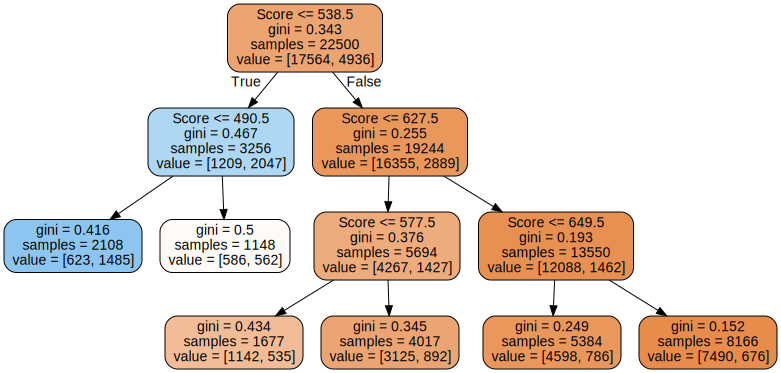

In [107]:
we.plot_tree(data_train_score[['Score','y']],max_depth=3,criterion='gini')

In [108]:
# 绘制决策树，并保存图片到本地
#we.plot_tree(data_train_score[['Score','y']],max_depth=3,criterion='gini',out_file='test.svg')

In [109]:
# 绘制决策树，并保存图片到本地
#we.plot_tree(data_train_score[['Score','y']],max_depth=3,criterion='gini',out_file='test.pdf')

In [110]:
# 计算基尼不纯度,使用原始数据
we.gini_impurity([1,1,1,0])

0.38

In [111]:
# 计算基尼不纯度,直接使用统计后数据进行计算
we.gini_impurity(c=[17564,4936])

0.34

## 金融函数

In [112]:
# 等额本息，计算每月还款
we.debx(amount=500000,rate=0.043,period=240)

3109.52

In [113]:
# 等额本息，查看还款计划
a = we.debx(amount=500000,rate=0.043,period=240,return_data=True)
a['data']

,期数,每月还款,本期本金,本期利息,本期剩余
0,1,3109.5200,1317.8500,1791.6700,498682.1500
1,2,3109.5200,1322.5800,1786.9400,497359.5700
2,3,3109.5200,1327.3100,1782.2100,496032.2600
3,4,3109.5200,1332.0700,1777.4500,494700.1900
4,5,3109.5200,1336.8400,1772.6800,493363.3500
...,...,...,...,...,...
235,236,3109.5200,3054.4000,55.1200,12328.6300
236,237,3109.5200,3065.3400,44.1800,9263.2900
237,238,3109.5200,3076.3300,33.1900,6186.9600
238,239,3109.5200,3087.3500,22.1700,3099.6100


In [114]:
# 等额本金，查看还款计划
a = we.debj(amount=500000,rate=0.043,period=240,return_data=True)
a['data']

,期数,每月还款,本期本金,本期利息,本期剩余
0,1,3875.0000,2083.3300,1791.6700,497916.6700
1,2,3867.5300,2083.3300,1784.2000,495833.3400
2,3,3860.0700,2083.3300,1776.7400,493750.0100
3,4,3852.6000,2083.3300,1769.2700,491666.6800
4,5,3845.1400,2083.3300,1761.8100,489583.3500
...,...,...,...,...,...
235,236,2120.6600,2083.3300,37.3300,8334.1200
236,237,2113.2000,2083.3300,29.8700,6250.7900
237,238,2105.7300,2083.3300,22.4000,4167.4600
238,239,2098.2700,2083.3300,14.9400,2084.1300


## 数学计算函数

In [115]:
we.sin(1)

0.8415

In [116]:
we.cos(1)

0.5403

## 日期计算函数

In [117]:
we.year_start('2023-05-23')

datetime.datetime(2023, 1, 1, 0, 0)

In [118]:
we.year_end('2023-05-23')

datetime.datetime(2023, 12, 31, 0, 0)

In [119]:
we.month_start('2023-05-23')

datetime.datetime(2023, 5, 1, 0, 0)

In [120]:
we.month_end('2023-04-23')

datetime.datetime(2023, 4, 30, 0, 0)

In [121]:
we.add_months('2023-04-30',-2)

datetime.datetime(2023, 2, 28, 0, 0)

In [122]:
# 计算日期差
we.date_diff('2023-05-01','2023-05-16')

15

In [123]:
# 计算月份差
we.date_diff('2023-05-01','2023-05-16','m')

0.5

In [124]:
# 计算年份差
we.date_diff('2022-05-01','2023-05-02','y')

1.0

In [125]:
# 计算月份差
we.month_diff('2023-05-01','2023-05-16')

0.5

In [126]:
# 计算月份差, 计算时日期按照1日进行计算，例如 '2023-05-15' 按 '2023-05-01'，'2023-06-16' 按'2023-06-01'进行计算 
we.month_diff('2023-05-15','2023-06-16',method='mm')

1

## 正则函数

In [127]:
# 正则查找函数
we.regexp_like('2023','[a-z]+')

False

In [128]:
# 正则替换函数
we.regexp_replace('2023westat2023','[0-9]+','')

'westat'

## 其他统计函数

In [129]:
# 获取指定值最大连续次数
we.get_max_continue([1,2,2,1,2,2,2,0],2)

3

In [130]:
# 获取连续大于指定值的次数,例如：检查列表中连续大于1的次数
we.get_over_continue([1,2,2,1,2,3,4,0],1)

3

In [131]:
# 获取大于指定值2，且相等的最大连续次数
we.get_over_continue([3,4,2,1,2,3,3,4,0],2,eq=True)

2

In [132]:
# nvl函数，如果变量取值为空，则赋值为另一个值
a=None
we.nvl(a,5)

5